In [ ]:
#Importer les modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import colorama
from colorama import Fore
from colorama import Style
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib.patches import Circle, Wedge, Rectangle
from math import log10

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


import ast
import scipy.stats as stats
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.inspection import permutation_importance
import math
from datetime import datetime
from datetime import timedelta, date

from functools import reduce
from sklearn.preprocessing import MinMaxScaler

In [2]:
print(pd.__version__)

1.3.4


In [ ]:
#A. IMPORTER LES DONNÉES:

In [3]:
cd Desktop\Data Science candidature\Projets\Projet 5\Data\

C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data


In [4]:
ls

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 609B-8774

 R‚pertoire de C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data

28/07/2022  08:29    <DIR>          .
28/07/2022  08:29    <DIR>          ..
23/06/2022  17:27        44ÿ717ÿ580 archive.zip
26/07/2022  20:19         7ÿ104ÿ383 Data.csv
26/07/2022  20:19        14ÿ961ÿ819 Data_norm.csv
26/07/2022  21:13         9ÿ534ÿ280 Data_sim.csv
28/07/2022  09:26        21ÿ680ÿ630 Data_sim2.csv
01/10/2021  19:08         9ÿ033ÿ957 olist_customers_dataset.csv
01/10/2021  19:08        61ÿ273ÿ883 olist_geolocation_dataset.csv
01/10/2021  19:08        15ÿ438ÿ671 olist_order_items_dataset.csv
01/10/2021  19:08         5ÿ777ÿ138 olist_order_payments_dataset.csv
01/10/2021  19:08        14ÿ451ÿ670 olist_order_reviews_dataset.csv
16/07/2022  00:55         8ÿ154ÿ045 olist_order_reviews_dataset.ods
01/10/2021  19:08        17ÿ654ÿ914 olist_orders_dataset.csv
01/10/2021  19:08         2ÿ379ÿ446 olist_pr

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------

#B. Création d'un seul tableau comportant les données des 9 tableaux fournis.

#B.1 Lectures des 9 tableaux de données.

In [5]:
d1=pd.read_csv('olist_customers_dataset.csv')

In [6]:
d2=pd.read_csv('olist_geolocation_dataset.csv')

In [7]:
d3=pd.read_csv('olist_order_items_dataset.csv')

In [8]:
d4=pd.read_csv('olist_order_payments_dataset.csv')

In [9]:
d5=pd.read_csv('olist_order_reviews_dataset.csv')

In [10]:
d6=pd.read_csv('olist_orders_dataset.csv')

In [11]:
d7=pd.read_csv('olist_products_dataset.csv')

In [12]:
d8=pd.read_csv('olist_sellers_dataset.csv')

In [13]:
d9=pd.read_csv('product_category_name_translation.csv')

In [ ]:
#B.2 Liste les variables présentes dans chaque dataset.
#On y vérifiera que les 'types' des variables dans les différents tableaux soient les mêmes. 

In [14]:
d1.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
#'customer_id'-> Chaque commande a un identifiant client unique.
#'customer_unique_id'-> identifiant unique d'un client.

In [15]:
d2.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [16]:
d3.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
#'order_id'-> identifiant unique de la commande.
#'order_item_id'-> numéro séquentiel identifiant le nombre d'articles inclus dans la même commande.
#'product_id'-> identifiant unique du produit.
#'seller_id'-> identifiant unique du vendeur.
#'shipping_limit_date'-> Indique la date limite d'expédition du vendeur pour le traitement de la commande par le partenaire 
#                        logistique.
#'price'-> prix de l'article.
#'freight_value'-> frets de l'article (si une commande comporte plus d'un article, la valeur de fret est répartie entre 
#                  les articles).

In [17]:
d4.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [ ]:
#'payment_sequential'-> un client peut payer une commande avec plus d'un moyen de paiement. S'il le fait, une séquence 
#sera créée pour cela.
#'payment_installments'-> nombre de versements choisi par le client.

In [18]:
d5.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [19]:
d6.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
#'order_id'-> identifiant unique de la commande.
#'customer_id'-> Chaque commande a un identifiant client unique.
#Du coup les 2 première variables disent la même chose en gros.

In [20]:
d7.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [21]:
d8.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [22]:
d9.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [ ]:
#Pour la base d2 on ne sait pas vraiment à quoi elle fait référence. Du coup on préférera ne pas la prendre en compte pour
#éviter les erreurs.

#Pour la base d9 elle n'est pas vraiment intéressante tant qu'on ait un nom de produit qu'il soit en anglais ou portugais 
#c'est pareil. On peut donc s'en passer de cette base de données.

#Pour la base d5 elle concerne que les commentaires des produits, on doit la prendre en compte car on veut identifier les
#bon clients en terme de commandes et satisfaction.

#'customer_id' -> Présent dans d1 et d6

#'order_id' -> Présent dans d3, d4, d5 et d6

#'product_id'-> Présent dans d3 et d7 

#'seller_id'-> Présent dans d8 et d3

#Ainsi on commence par fusionner: d1 et d6; d3 et d7 puis d3_a (résultat de la fusion d3 et d7) avec d8.
#Ensuite on fusionne d3_b (résultat des deux fusions d3 avec d7 et d8), d4, d5 et d6_a (résultat de al fusion de d1 et d6).



#--------------------------------------------------------------------------------------------------------------------------
#B.3 Fusion des tableaux.
#B.3.1 Identification du nombre de lignes, des 'NaN' et des doublons dans les différents tableaux choisis (ie. d1, d3, d4, 
#      d6, d7, d8).(Principalement concernant les variables 'customer_id','order_id', 'product_id', 'seller_id').

In [23]:
d1.shape

(99441, 5)

In [24]:
d1.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [25]:
d1_sans_doublons=d1.drop_duplicates()
d1_sans_doublons.shape

(99441, 5)

In [26]:
d1_g=d1.groupby(['customer_id']).count()
d1_g1=d1_g.sort_values(by=['customer_unique_id'], ascending=False)
d1_g1

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,1,1,1,1
aa62a16b10e3fb24ecdefd7e4dc3fa65,1,1,1,1
aa738cdb72af39e38482fa25b992c67c,1,1,1,1
aa7210736aad65a84e964cfa8d64aa66,1,1,1,1
aa72002446dfbac0691304465c1b982d,1,1,1,1
...,...,...,...,...
5591abc9e7f9c644e7e7912aac65b718,1,1,1,1
5590e685a78102fb3ac27ecf07412750,1,1,1,1
558ea29f4c4dfd014345b6d3309549a2,1,1,1,1


In [ ]:
#-------------------------------------------

In [27]:
d3.shape

(112650, 7)

In [28]:
d3.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
d3_sans_doublons=d3.drop_duplicates()
d3_sans_doublons.shape

(112650, 7)

In [30]:
d3_sd=d3.drop_duplicates(subset =['order_id'])
d3_sd=pd.DataFrame(d3_sd)
d3_sd.shape

(98666, 7)

In [31]:
d3_g=d3.groupby(['order_id']).count()
d3_g1=d3_g.sort_values(by=['order_item_id'], ascending=False)
d3_g1

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
8272b63d03f5f79c56e9e4120aec44ef,21,21,21,21,21,21
1b15974a0141d54e36626dca3fdc731a,20,20,20,20,20,20
ab14fdcfbe524636d65ee38360e22ce8,20,20,20,20,20,20
9ef13efd6949e4573a18964dd1bbe7f5,15,15,15,15,15,15
428a2f660dc84138d969ccd69a0ab6d5,15,15,15,15,15,15
...,...,...,...,...,...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1,1,1,1,1,1
5a082b558a3798d3e36d93bfa8ca1eae,1,1,1,1,1,1
5a07264682e0b8fbb3f166edbbffc6e8,1,1,1,1,1,1


In [32]:
dg3_g2=d3_g.loc[d3_g['order_item_id']>1]
dg3_g2.count()

order_item_id          9803
product_id             9803
seller_id              9803
shipping_limit_date    9803
price                  9803
freight_value          9803
dtype: int64

In [33]:
dg3_g3=d3.loc[d3['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
dg3_g3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [ ]:
#Dans une même commande (ie. pour une même 'order_id') on peut avoir plusieurs produits (ie. plusieurs 'product_id').

#Regardons le nombre de 'product_id' différents:

In [34]:
d3_g4=d3.groupby(['product_id']).count()
d3_g4.shape

(32951, 6)

In [ ]:
#Il y a 32 951 produits différents.

#Regardons le nombre de 'seller_id' différents:

In [35]:
d3_g5=d3.groupby(['seller_id']).count()
d3_g5.shape

(3095, 6)

In [ ]:
#Il y a 3 095 vendeurs différents.

#-------------------------------------------

In [36]:
d4.shape

(103886, 5)

In [37]:
d4.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [38]:
d4_sans_doublons=d4.drop_duplicates()
d4_sans_doublons.shape

(103886, 5)

In [39]:
d4_g=d4.groupby(['order_id']).count()
d4_g1=d4_g.sort_values(by=['payment_sequential'], ascending=False)
d4_g1

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
fa65dad1b0e818e3ccc5cb0e39231352,29,29,29,29
ccf804e764ed5650cd8759557269dc13,26,26,26,26
285c2e15bebd4ac83635ccc563dc71f4,22,22,22,22
895ab968e7bb0d5659d16cd74cd1650c,21,21,21,21
fedcd9f7ccdc8cba3a18defedd1a5547,19,19,19,19
...,...,...,...,...
56bd45163229b35ca0ab490c1e3d3233,1,1,1,1
56bc98e6d5b88c2cdb905f2fbec2ca3a,1,1,1,1
56bbc7d92e6e74b8782abbf5ee336a92,1,1,1,1


In [40]:
d4_g2=d4.loc[d4['order_id'].isin(['fa65dad1b0e818e3ccc5cb0e39231352'])]
d4_g2

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [41]:
d4_g3=d4.loc[d4['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d4_g3


,order_id,payment_sequential,payment_type,payment_installments,payment_value
71010,8272b63d03f5f79c56e9e4120aec44ef,1,credit_card,2,196.11


In [ ]:
#L’existence de lignes presque doublons concernant le 'order_id' dans les deux dataset d3 et d4 (cette variable étant la
#variable commune à ces deux dataset) présente un problème au moment du merge. En fait le nombre de lignes finales post 
#merge ne correspondra pas au nombre de lignes de l'un des deux, ou des valeurs de leur intersection, il sera toujours 
#supérieur à cause de ces doublons dans la variable cible du merge dans les deux dataset.

#Pour résoudre ce problème il faut enlever les doublons liés à la variable 'order_id' dans les deux dataset. Compte tenue
#que les doublons du 'order_id' sont dûs au à la considération individuelle des items dans chaque commande pour d3, et au
#'payment_sequential' pour d4, on peut remanier les deux bases pour considérer dans chacune des deux une seule commande.

#Dans la base finale on aura une seule 'order_id', avec le 'nombre_total_items', 'Prix_total_produits', 
#'freight_value_total'. Mais ceci sera fait à la fin des mergings car on doit garder l'individualité des produits pour 
#merger d3 et d7 avec leur variable commune 'product_id'.

#Dans d4 on gardera uniquement le 'payment_sequantial' le plus grand (car il indique le nombre total de moyen de paiement 
#utilisés par le client) et on fera la somme des 'payment_value', pour avoir le 'payment_value_total'.

In [42]:
d4_f1=d4.groupby(['order_id'], as_index=False).sum('payment_value')
d4_f1.shape

(99440, 4)

In [43]:
d4_f1.head()

,order_id,payment_sequential,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,218.04


In [44]:
d4_f1.drop(['payment_sequential','payment_installments'], inplace=True, axis=1)

In [45]:
d4_f2=d4.groupby(['order_id'], as_index=False).max()
d4_f2.shape

(99440, 5)

In [46]:
d4_f2.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04


In [47]:
d4_f2.drop('payment_value', inplace=True, axis=1)
 

In [48]:
d4_f = pd.merge(d4_f2,d4_f1, how='inner', on='order_id')

In [ ]:
##Vérification:

In [ ]:
##d4_g4=d4_f.loc[d4_f['order_id'].isin(['fa65dad1b0e818e3ccc5cb0e39231352'])]
##d4_g4

In [ ]:
##d4_g5=d4_f.loc[d4_f['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
##d4_g5

In [ ]:
##d4_f.head()

In [ ]:
##Fin Vérification

#-------------------------------------------

In [49]:
d5.shape

(99224, 7)

In [50]:
d5.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#Notez qu'on a beaucoup de données manquantes pour les 'review_comment_title' et 'review_comment_message', mais on n'en n'a
#aucune pour le 'review_score'; c'est donc cette dernière variable qu'on utilisera pour mesurer le degré de satisfaction 
#des clients.

In [51]:
d5_sans_doublons=d5.drop_duplicates()
d5_sans_doublons.shape

(99224, 7)

In [52]:
d5_g=d5.groupby(['order_id']).count()
d5_g1=d5_g.sort_values(by=['review_score'], ascending=False)
d5_g1

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
8e17072ec97ce29f0e1f111e598b0c85,3,3,0,3,3,3
c88b1d1b157a9999ce368f218a407141,3,3,0,0,3,3
03c939fd7fd3b38f8485a0f95798f1f6,3,3,0,2,3,3
df56136b8031ecd28e200bb18e6ddb2e,3,3,0,0,3,3
29062384ce4975f78aeba6a496510386,2,2,0,2,2,2
...,...,...,...,...,...,...
559609410c90dc1792181a5f260a6600,1,1,0,0,1,1
5595480d373b37e5738fc085dd9bcb8e,1,1,0,0,1,1
559115c14f48d999adcc027b4a702c8b,1,1,0,0,1,1


In [53]:
d5_g2=d5.loc[d5['order_id'].isin(['8e17072ec97ce29f0e1f111e598b0c85'])]
d5_g2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
44694,67c2557eb0bd72e3ece1e03477c9dff5,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Entregou o produto errado.,2018-04-07 00:00:00,2018-04-08 22:48:27
64510,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07 00:00:00,2018-04-07 21:13:05
92300,6e4c4086d9611ae4cc0cc65a262751fe,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,"Embora tenha entregue dentro do prazo, não env...",2018-04-14 00:00:00,2018-04-16 11:37:31


In [ ]:
#-------------------------------------------

In [54]:
d6.shape

(99441, 8)

In [55]:
d6.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [56]:
d6_sans_doublons=d6.drop_duplicates()
d6_sans_doublons.shape

(99441, 8)

In [57]:
d6_g=d6.groupby(['customer_id']).count()
d6_g1=d6_g.sort_values(by=['order_id'], ascending=False)
d6_g1

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1,1,1,1,1,1,1
aa62a16b10e3fb24ecdefd7e4dc3fa65,1,1,1,1,1,1,1
aa738cdb72af39e38482fa25b992c67c,1,1,1,1,1,1,1
aa7210736aad65a84e964cfa8d64aa66,1,1,1,1,1,1,1
aa72002446dfbac0691304465c1b982d,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
5591abc9e7f9c644e7e7912aac65b718,1,1,1,1,1,1,1
5590e685a78102fb3ac27ecf07412750,1,1,1,1,1,1,1
558ea29f4c4dfd014345b6d3309549a2,1,1,1,1,1,1,1


In [ ]:
#-------------------------------------------

In [58]:
d7.shape

(32951, 9)

In [ ]:
#Notez que tous les 'products_id' présents dans ce dataset sont présent dans le dataset d3 (ie. le nombre de lignes de d7
#correspond au nombre total de 'produc_id' différents identifiés dans d3).

In [59]:
d7.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [60]:
d7_sans_doublons=d7.drop_duplicates()
d7_sans_doublons.shape

(32951, 9)

In [61]:
d7_g=d7.groupby(['product_id']).count()
d7_g1=d7_g.sort_values(by=['product_category_name'], ascending=False)
d7_g1

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,1,1,1,1,1,1,1,1
aa8dbe0ebad6906e9253479e1027185e,1,1,1,1,1,1,1,1
aaa86ad1d7ea86a2a753f71b5575736b,1,1,1,1,1,1,1,1
aaa86a9a394d5df9490a43aa78b4a59d,1,1,1,1,1,1,1,1
aaa80d9e907a758e151586557e332acb,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
4c50dcc50f1512f46096d6ef0142c4a9,0,0,0,0,1,1,1,1
788c40790a78e5fb65513510fc00919c,0,0,0,0,1,1,1,1
ea11e700a343582ad56e4c70e966cb36,0,0,0,0,1,1,1,1


In [ ]:
#-------------------------------------------

In [62]:
d8.shape

(3095, 4)

In [ ]:
#Notez que tous les 'seller_id' présents dans ce dataset sont présent dans le dataset d3 (ie. le nombre de lignes de d8
#correspond au nombre total de 'seller_id' différents identifiés dans d3).

In [63]:
d8.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [64]:
d8_sans_doublons=d8.drop_duplicates()
d8_sans_doublons.shape

(3095, 4)

In [65]:
d8_g=d8.groupby(['seller_id']).count()
d8_g1=d8_g.sort_values(by=['seller_zip_code_prefix'], ascending=False)
d8_g1

,seller_zip_code_prefix,seller_city,seller_state
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,1,1
a7a9b880c49781da66651ccf4ba9ac38,1,1,1
aadfe0417e61315688b6bd7043361e25,1,1,1
aae3bfea055532c57fb453ed3ec80b30,1,1,1
aae5953b9edddf14749c0d65d60eb4b9,1,1,1
...,...,...,...
54aa8463e87776b5612f4bdc4bd5d4de,1,1,1
54c04bdb5ec46762f8f08c7e8f86ed4a,1,1,1
55029529919c0123526150bd26ca8f20,1,1,1


In [ ]:
#-------------------------------------------


#Notez que les variables utiles à la fusion des tableaux car étant présentes dans plusieurs d'entre eux (ie.'custumer_id', 
#'order_id', 'product_id', 'seller_id'), n'ont pas de NaN. Du coup il ne faut pas s'en inquiéter pour la fusion des 
#tableaux.

#Notez que tous les tableaux son libres de lignes en avec des doublons dans toutes les colonnes. Néanmoins, dans les 
#dataset d3 et d4 il y a des 'order_id' qui se répètent et ceci peut causer un problème au moment du merge.

#Notez aussi que tous les tableaux n'ont pas le même nombre de lignes:
#d1 et d6 (qui ont tous les deux la variable 'customer_id') on le même nombre de lignes: 99441;
#d3 et d4 (qui ont tous les deux la variable 'order_id') ont aussi le même nombre de lignes: 103886.
#C'est normal, un même client peut avoir passé plusieurs commandes.



#B.3.2 d1 et d6.

In [66]:
d6_a = pd.merge(d1,d6, how='inner', on='customer_id')

In [67]:
d6_a.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [ ]:
##Vérification de la fusion:

In [ ]:
#d6_a.count()

In [ ]:
##On a bien le même nombre de lignes que d1 et d6, les deux bases ayant le même nombre de lignes et les mêmes 'customer_id'.

In [ ]:
#d6_a.isna().sum()

In [ ]:
#On a comme attendu le même nombre de NaN que d6. Ceci car les deux dataset d1 et d6 ont le même nombre de lignes et les 
#mêmes 'customer_id'.

In [ ]:
#d6_1=d6.loc[d6['customer_id'].isin(['06b8999e2fba1a1fbc88172c00ba8bc7'])]
#d6_1

In [ ]:
#d1_1=d1.loc[d1['customer_id'].isin(['06b8999e2fba1a1fbc88172c00ba8bc7'])]
#d1_1

In [ ]:
#d6_a_1=d6_a.loc[d6_a['customer_id'].isin(['06b8999e2fba1a1fbc88172c00ba8bc7'])]
#d6_a_1

In [ ]:
##Fin de vérification



#B.3.3 d3 et d7.

In [68]:
d3_a = pd.merge(d3,d7, how='left', on='product_id')

In [69]:
d3_a.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
##Vérification de la fusion:

In [ ]:
#d3_a.count()

In [ ]:
##On a bien le même nombre de lignes que d3, la base qui a plus de lignes entre d3 et d7.

In [ ]:
#d3_a.isna().sum()

In [ ]:
#Les produits peuvent se répéter dans les commandes, les NaN en plus correspondent aux produits pour lesquels des données ne
#sont pas renseignées et qui se répétent.

In [ ]:
#d3_1=d3.loc[d3['product_id'].isin(['8e17072ec97ce29f0e1f111e598b0c85'])]
#d3_1

In [ ]:
#d7_1=d7.loc[d7['product_id'].isin(['4244733e06e7ecb4970a6e2683c13e61'])]
#d7_1

In [ ]:
#d3_a_1=d3_a.loc[d3_a['product_id'].isin(['4244733e06e7ecb4970a6e2683c13e61'])]
#d3_a_1

In [ ]:
##Fin de la vérification.



#B.3.4 d3_a, d8.

In [70]:
d3_b = pd.merge(d3_a,d8, how='left', on='seller_id')

In [71]:
d3_b.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [ ]:
##Vérification de la fusion:

In [ ]:
#d3_b.count()

In [ ]:
##On a bien le même nombre de lignes que d3, la base qui a plus de lignes entre d3 et d8.

In [ ]:
#d3_b.isna().sum()

In [ ]:
##Les vendeurs peuvent se répéter, les NaN en plus correspondent aux vendeurs pour lesquels des données ne sont pas 
##renseignées et qui se répétent.

In [ ]:
#d3_2=d3.loc[d3['seller_id'].isin(['48436dade18ac8b2bce089ec2a041202'])]
#d3_2

In [ ]:
#d8_1=d8.loc[d8['seller_id'].isin(['48436dade18ac8b2bce089ec2a041202'])]
#d8_1

In [ ]:
#d3_b_1=d3_b.loc[d3_b['seller_id'].isin(['48436dade18ac8b2bce089ec2a041202'])]
#d3_b_1

In [ ]:
##Fin vérification.



#B.3.5 d3_b, d4_f et d6_a
#On commence par merger d3_b et d4_f.

In [72]:
d3_c = pd.merge(d3_b, d4_f, how='left', on='order_id')

In [73]:
d3_c.head() 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,3471,sao paulo,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,14403,franca,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,87900,loanda,PR,1.0,credit_card,3.0,218.04


In [74]:
d3_c.count()

order_id                      112650
order_item_id                 112650
product_id                    112650
seller_id                     112650
shipping_limit_date           112650
price                         112650
freight_value                 112650
product_category_name         111047
product_name_lenght           111047
product_description_lenght    111047
product_photos_qty            111047
product_weight_g              112632
product_length_cm             112632
product_height_cm             112632
product_width_cm              112632
seller_zip_code_prefix        112650
seller_city                   112650
seller_state                  112650
payment_sequential            112647
payment_type                  112647
payment_installments          112647
payment_value                 112647
dtype: int64

In [ ]:
#On a bien le même nombre de lignes que d3, la base qui a plus de lignes entre d3 et d8.

In [75]:
d3_c.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64

In [ ]:
#Les commandes peuvent se répéter, les NaN en plus correspondent aux vendeurs pour lesquels des données ne sont pas 
#renseignées et qui se répètent.

#Vérifions que les commandes qui se répètent dans d3 (puisque elles ont plusieurs produits) sont toutes prises en compte.

In [76]:
d3_1=d3.loc[d3['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d3_1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [77]:
d4_1=d4.loc[d4['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d4_1

,order_id,payment_sequential,payment_type,payment_installments,payment_value
71010,8272b63d03f5f79c56e9e4120aec44ef,1,credit_card,2,196.11


In [78]:
d3_c1=d3_c.loc[d3_c['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d3_c1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,232.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,21.0,4.0,15.0,3813,sao paulo,SP,1.0,credit_card,2.0,196.11


In [ ]:
#On merge ensuite d3_c et d6_a.

In [79]:
d3_d = pd.merge(d3_c, d6_a, how='left', on='order_id')

In [80]:
d3_d.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [81]:
d3_d.count()

order_id                         112650
order_item_id                    112650
product_id                       112650
seller_id                        112650
shipping_limit_date              112650
price                            112650
freight_value                    112650
product_category_name            111047
product_name_lenght              111047
product_description_lenght       111047
product_photos_qty               111047
product_weight_g                 112632
product_length_cm                112632
product_height_cm                112632
product_width_cm                 112632
seller_zip_code_prefix           112650
seller_city                      112650
seller_state                     112650
payment_sequential               112647
payment_type                     112647
payment_installments             112647
payment_value                    112647
customer_id                      112650
customer_unique_id               112650
customer_zip_code_prefix         112650


In [ ]:
#On a bien le même nombre de lignes que d3, la base qui a plus de lignes entre d3 et d8.

In [82]:
d3_d.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_sta

In [ ]:
#Les commandes peuvent se répéter, les NaN en plus correspondent aux vendeurs pour lesquels des données ne sont pas 
#renseignées et qui se répètent.



#B.3.6 d3_d et d5.

#Il manque la fusion du dataset d5, mais il faut comprendre comment les commentaires sont associés aux commandes, car dans
#notre fichier obtenu avec les fusions des autres basses on une ligne pour chaque produit de chaque commande, et dans le 
#dataset d5 on a des commentaires liés aux commandes.

#B.3.6.1 Tests de repérage et compréhension de d5:

In [83]:
d3_d1=d3_d.loc[d3_d['order_id'].isin(['8e17072ec97ce29f0e1f111e598b0c85'])]
d3_d1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
62234,8e17072ec97ce29f0e1f111e598b0c85,1,ac20a9614b6db9e7289b85c4f4b6216a,d91fb3b7d041e83b64a00a3edfb37e4f,2018-04-05 15:50:11,40.0,19.32,eletrodomesticos,59.0,190.0,...,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,delivered,2018-03-31 15:08:21,2018-03-31 15:50:11,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04 00:00:00


In [84]:
d5_g2=d5.loc[d5['order_id'].isin(['8e17072ec97ce29f0e1f111e598b0c85'])]
d5_g2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
44694,67c2557eb0bd72e3ece1e03477c9dff5,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Entregou o produto errado.,2018-04-07 00:00:00,2018-04-08 22:48:27
64510,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07 00:00:00,2018-04-07 21:13:05
92300,6e4c4086d9611ae4cc0cc65a262751fe,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,"Embora tenha entregue dentro do prazo, não env...",2018-04-14 00:00:00,2018-04-16 11:37:31


In [85]:
d3_d2=d3_d.loc[d3_d['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d3_d2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,232.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,beleza_saude,45.0,231.0,...,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00


In [86]:
d5_g3=d5.loc[d5['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
d5_g3

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
14999,e8236fe7b6e1bdd513a500de361e2b87,8272b63d03f5f79c56e9e4120aec44ef,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07


In [ ]:
#On cherche à identifier les bon et les moins bons clients en terme de commandes et de satisfaction

#Les reviews sont associées aux commandes complètes (aux 'order_id' qui sont les identifiants uniques de chaque commande), 
#on n'a pas moyen de lier forcément une review a un produit de la commande. Dans les deux exemples pris, on a 3 reviews pour
#une commande avec un seul produit et une seule review pour une commande avec 21 produits.
#Néanmoins pour chaque commande (comme il est le cas de l'exemple précédent) peut avoir plusieurs review, et donc plusieurs 
#'review score'. Il convient donc de calculer pour chaque commande la moyenne de chaque review score afin d'associer ces 
#moyennes à chaque commande.

#B.3.6.1 Calcul des moyennes des 'review_score' associés à chaque commande:

In [87]:
d5_f1=d5.groupby(['order_id'], as_index=False).mean('review_score')
d5_f1.shape

(98673, 2)

In [88]:
d5_f1.rename(columns={'review_score': 'review_score_moyen'}, inplace=True)
d5_f1

,order_id,review_score_moyen
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


In [ ]:
#Notez qu'on retrouve le nombre de lignes qu'a d5 quand on regroupe par 'order_id' (ie. quand on enlève les doublons de la
#variable 'order_id').

##Vérification:

In [ ]:
#d5_g4=d5_f1.loc[d5_f1['order_id'].isin(['8e17072ec97ce29f0e1f111e598b0c85'])]
#d5_g4

In [ ]:
##Pour notre exemple précédent où on avait 3 'review_score' à 1 associés à cette commande on retrouve bien 1 dans le 
##'review_score_moyen'. le calcul est donc correct.

##Fin vérification.




#B.3.6.2 Fusion de d3_d et d5_f1.

In [89]:
d3_e = pd.merge(d3_d, d5_f1, how='left', on='order_id')

In [90]:
d3_e.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0


In [91]:
d3_e.count()

order_id                         112650
order_item_id                    112650
product_id                       112650
seller_id                        112650
shipping_limit_date              112650
price                            112650
freight_value                    112650
product_category_name            111047
product_name_lenght              111047
product_description_lenght       111047
product_photos_qty               111047
product_weight_g                 112632
product_length_cm                112632
product_height_cm                112632
product_width_cm                 112632
seller_zip_code_prefix           112650
seller_city                      112650
seller_state                     112650
payment_sequential               112647
payment_type                     112647
payment_installments             112647
payment_value                    112647
customer_id                      112650
customer_unique_id               112650
customer_zip_code_prefix         112650


In [ ]:
#On a bien le même nombre de lignes que d3, la base qui a plus de lignes entre d3 et d8.

In [92]:
d3_e.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_sta

In [ ]:
#Les commandes peuvent se répéter, les NaN en plus correspondent aux vendeurs pour lesquels des données ne sont pas 
#renseignées et qui se répètent.


#--------------------------------------------------------------------------------------------------------------------------

#Une fois que toutes les fusion furent faites étudions la base résultante.




#B.4 Étude de la première base résultante.

#On cherche à identifier les bons et les mauvais clients en termes de commandes et satisfaction.

#Quand on jette un coup d’œil aux variables du dataset final et on ré-contextualiase par rapport à notre objectif. Il y
#y a des variables qui dès le début peuvent être éliminées car elles n'ont pas vraiment d'intérêt par rapport à notre
#objectifs:

    #Pour certaines, il s'agit de caractéristiques intrinsèques du produit que le client connaît avant l'achat du coup il en
    #est conscient au moment d'acheter et ça n’influence pas sur ça satisfaction car ce fut sont choix dès le début. Il 
    #s'agit des variables:'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
    #'product_length_cm', 'product_height_cm' et 'product_width_cm'. 

    #Pour d'autres comme 'order_approved_at' ou 'order_delivered_carrier_date' ce sont plus des 
    #données de suivi, qui n'interviennent pas dans la satisfaction du client, en fait le client s'en fou de cela tant que 
    #son colis est livré dans les temps établis voir même plus vite.

    #Il y a aussi La variable 'customer_id' qui par définition représente un identifiant de client unique donné à chaque 
    #commande, nous on est donc plutôt intéressés à identifier les clients de façon concrète et donc c'est le 
    #'customer_unique_id' qui nous intéresse.

#On peut donc les éliminer les variables précédentes.


#B.4.1 Élimination de certaines variables non utiles pour notre objectif:

In [93]:
d3_final1=d3_e.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_approved_at', 'order_delivered_carrier_date','customer_id' ], axis=1)
d3_final1.count()

order_id                         112650
order_item_id                    112650
product_id                       112650
seller_id                        112650
shipping_limit_date              112650
price                            112650
freight_value                    112650
product_category_name            111047
seller_zip_code_prefix           112650
seller_city                      112650
seller_state                     112650
payment_sequential               112647
payment_type                     112647
payment_installments             112647
payment_value                    112647
customer_unique_id               112650
customer_zip_code_prefix         112650
customer_city                    112650
customer_state                   112650
order_status                     112650
order_purchase_timestamp         112650
order_delivered_customer_date    110196
order_estimated_delivery_date    112650
review_score_moyen               111708
dtype: int64

In [ ]:
##Vérification

In [ ]:
#d3_final1.head()

In [ ]:
#d3_final1_a=d3_final1.loc[d3_final1['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
#d3_final1_a

In [ ]:
##Fin vérification.



#B.4.2 Caractéristiques générales du dataset obtenu.

In [94]:
d3_final1.describe()

,order_item_id,price,freight_value,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score_moyen
count,112650.000000,112650.000000,112650.000000,112650.000000,112647.000000,112647.000000,112647.000000,112650.000000,111708.000000
mean,1.197834,120.653739,19.990320,24439.170431,1.044768,3.018385,180.281186,35119.309090,4.033128
std,0.705124,183.633928,15.806405,27596.030909,0.385372,2.802552,272.849042,29866.120801,1.386119
min,1.000000,0.850000,0.000000,1001.000000,1.000000,0.000000,9.590000,1003.000000,1.000000
25%,1.000000,39.900000,13.080000,6429.000000,1.000000,1.000000,65.670000,11310.000000,4.000000
50%,1.000000,74.990000,16.260000,13568.000000,1.000000,2.000000,114.440000,24340.000000,5.000000
75%,1.000000,134.900000,21.150000,27930.000000,1.000000,4.000000,195.390000,59028.750000,5.000000
max,21.000000,6735.000000,409.680000,99730.000000,29.000000,24.000000,13664.080000,99990.000000,5.000000


In [95]:
d3_final1.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_score_moyen               float64
dtype: object

In [96]:
shipping_limit_date_unique=d3_final1['order_purchase_timestamp'].sort_values(ascending=False)
shipping_limit_date_unique

37073     2018-09-03 09:06:57
23530     2018-08-29 15:00:37
1722      2018-08-29 14:52:00
9829      2018-08-29 14:18:28
4924      2018-08-29 14:18:23
                 ...         
84390     2016-09-15 12:16:38
84389     2016-09-15 12:16:38
101394    2016-09-05 00:15:34
20266     2016-09-04 21:15:19
20265     2016-09-04 21:15:19
Name: order_purchase_timestamp, Length: 112650, dtype: object

In [ ]:
#On a des données d'achats depuis septembre 2016, jusqu'à septembre 2018.


#Afin de pouvoir continuer il nous faut savoir le nombre de 'product_category_name' et de 'seller_id' différents qui sont 
#associés à chaque 'order_id'. En effet, au cas où la robustesse de la data (ie. le nombre d'années de data) nous permette 
#de confirmer que un seul 'product_category_name' et/ou un seul 'seller_id' sont associés à chaque 'order_id', on pourra 
#décider de la fusion de certaines lignes pour simplifier notre base de données 



#B.4.3 Étude sur le nombre de 'product_category_name' associés à chaque 'order_id'.

In [97]:
d3_final1_b=d3_final1
d3_final1_b['Nombre_total_catégories'] = d3_final1_b.groupby('order_id')['product_category_name'].transform('nunique')
d3_final1_c=d3_final1_b.groupby(['order_id'], as_index=False).mean('Nombre_total_catégories')
d3_final1_d=d3_final1_c.sort_values(by=['Nombre_total_catégories'], ascending=False)
d3_final1_d

,order_id,order_item_id,price,freight_value,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score_moyen,Nombre_total_catégories
18557,306b4ec62d908535f2bfa2877665e899,2.0,80.596667,11.520,18186.000000,1.0,8.0,276.35,12233.0,2.0,3.0
18227,2f8f31eb2f7b6572836d662a6625c8e4,2.0,31.566667,10.960,35700.000000,1.0,1.0,127.58,36780.0,5.0,3.0
55847,91be51c856a90d7efe86cf9d082d6ae3,2.5,84.860000,14.615,26463.250000,1.0,18.0,397.90,14806.0,1.0,3.0
11231,1d23106803c48c391366ff224513fb7f,2.5,37.197500,16.350,14940.000000,1.0,1.0,214.19,96020.0,1.0,3.0
18489,3040863957c9336e7389512584639bb5,2.0,65.963333,20.320,34897.333333,1.0,10.0,258.85,96180.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19944,33f70271657afa8d0e69c98ba812e841,1.0,159.800000,9.930,6150.000000,1.0,4.0,169.73,12940.0,4.0,0.0
8122,1515cf99add38d4baa19a14346e25b31,1.0,122.990000,14.610,7133.000000,1.0,1.0,137.60,22210.0,5.0,0.0
44063,725d9a21b91d5ee08aaa56ef88058147,1.0,69.000000,38.030,4424.000000,1.0,1.0,107.03,58431.0,5.0,0.0
90472,eaa0211ae0667cb758713505ee149479,1.0,15.000000,8.270,18040.000000,2.0,1.0,23.27,1442.0,5.0,0.0


In [ ]:
#Notez que dans une même commande on peut avoir plusieurs 'product_category_name'.

#Vérification.

In [98]:
d3_final1_t=d3_final1_b.loc[d3_final1_b['order_id'].isin(['306b4ec62d908535f2bfa2877665e899'])]
d3_final1_t

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_zip_code_prefix,seller_city,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories
21160,306b4ec62d908535f2bfa2877665e899,1,80619103c2b3bc2fe8358f9c3c0bd2c7,8444e55c1f13cd5c179851e5ca5ebd00,2017-12-14 18:14:28,35.90,9.87,perfumaria,37584,congonhal,...,8004f80e361a5ee23aadb7418a685fc2,12233,sao jose dos campos,SP,delivered,2017-12-10 18:07:24,2017-12-16 14:57:12,2018-01-18 00:00:00,2.0,3
21161,306b4ec62d908535f2bfa2877665e899,2,963de692a94b199318977a5f0819636b,ef506c96320abeedfb894c34db06f478,2017-12-14 18:14:28,35.99,1.98,market_place,3569,sao paulo,...,8004f80e361a5ee23aadb7418a685fc2,12233,sao jose dos campos,SP,delivered,2017-12-10 18:07:24,2017-12-16 14:57:12,2018-01-18 00:00:00,2.0,3
21162,306b4ec62d908535f2bfa2877665e899,3,65baa03ed325a23536e96fd66b3244c8,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-14 18:14:28,169.90,22.71,cama_mesa_banho,13405,piracicaba,...,8004f80e361a5ee23aadb7418a685fc2,12233,sao jose dos campos,SP,delivered,2017-12-10 18:07:24,2017-12-16 14:57:12,2018-01-18 00:00:00,2.0,3


In [99]:
d5_t=d5.loc[d5['order_id'].isin(['306b4ec62d908535f2bfa2877665e899'])]
d5_t

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
56781,a555fec0a2d54ccb104762e54f058603,306b4ec62d908535f2bfa2877665e899,2,NaN,"Fiz um pedido de 4 itens, ele foi separado em ...",2017-12-17 00:00:00,2017-12-17 18:25:11


In [ ]:
#Notez que pour le 'order_id' précédent où il y a 3  différents 'product_category_name' (et 3 'seller_id') différents il y 
#a une seule review. On ne peut donc pas associer les reviews ni aux produits, ni aux vendeurs, ce qui rends les variables 
#directement liées aux produits et au vendeurs inintéressantes par rapport à notre objectif.



#B.4.4 Étude sur le nombre de 'seller_id' associés à chaque 'order_id'.

In [100]:
d3_final1_e=d3_final1_b
d3_final1_e['Nombre_total_vendeurs'] = d3_final1_e.groupby('order_id')['seller_id'].transform('nunique')
d3_final1_f=d3_final1_e.groupby(['order_id'], as_index=False).mean('Nombre_total_vendeurs')
d3_final1_g=d3_final1_f.sort_values(by=['Nombre_total_vendeurs'], ascending=False)
d3_final1_g

,order_id,order_item_id,price,freight_value,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs
10831,1c11d0f4353b31ac3417fbfa5f0f2a8a,4.0,43.824286,16.418571,38187.857143,3.0,1.0,421.69,98700.0,1.0,1.0,5.0
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,3.5,27.198333,8.998333,17769.166667,1.0,2.0,217.18,78050.0,1.0,2.0,5.0
53796,8c2b13adf3f377c8f2b06b04321b0925,2.5,110.472500,26.350000,29781.750000,1.0,5.0,547.29,93890.0,1.0,3.0,4.0
55847,91be51c856a90d7efe86cf9d082d6ae3,2.5,84.860000,14.615000,26463.250000,1.0,18.0,397.90,14806.0,1.0,3.0,4.0
11231,1d23106803c48c391366ff224513fb7f,2.5,37.197500,16.350000,14940.000000,1.0,1.0,214.19,96020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33095,55e186387dc4b33d16d86a920ee7f77b,1.0,150.000000,15.130000,90230.000000,1.0,2.0,165.13,99360.0,5.0,1.0,1.0
33094,55e144afb3e4115f6c520fb6242cd1bf,1.0,49.590000,11.730000,3551.000000,1.0,1.0,61.32,1410.0,1.0,0.0,1.0
33093,55dfff244bc5d5f81d58d4148062c9b6,1.0,50.900000,19.060000,14940.000000,1.0,6.0,69.96,77015.0,2.0,1.0,1.0
33092,55dfe839c1db3060005158c694bddb4e,1.0,68.000000,11.980000,14580.000000,1.0,1.0,79.98,3118.0,5.0,1.0,1.0


In [ ]:
#Notez que dans un même commande on peut avoir plusieurs 'seller_id' différents.


#On constate ainsi que Olist est une plataforme qui permet aux clients dans une même commande d'acheter des produits bien 
#divers chez différent vendeurs. 
#Même s'il serait intéressant de voir quel types de produits et quel vendeurs contribuent à avoir de bons clients par 
#rapport aux commandes et à la satisfaction (ie.notre objectif) comme le 'review_score_moyen'est donné par commande, et donc
#n'identifiant pas spécifiquement les produits et/ou vendeurs, on pourra se passer des variables directement liées à ces 2
#concepts: 'product_id', 'product_category_name', 'seller_id', 'seller_zip_code_prefix', 'seller_city' et 'seller_state'.
#Néanmoins on enrichira notre base avec les variables 'Nombres de catégories' et 'Nombres de vendeurs', qui peuvent nous 
#apporter des information intéressantes, et qui en quelque sorte incluent les variables précédentes que l'on a décidé 
#d'éliminer.




#B.4.5 Élimination des variables directement liées aux produits et aux vendeurs.

In [101]:
d3_final1_h=d3_final1_e.drop(['product_id', 'product_category_name', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], axis=1)
d3_final1_h.count()

order_id                         112650
order_item_id                    112650
shipping_limit_date              112650
price                            112650
freight_value                    112650
payment_sequential               112647
payment_type                     112647
payment_installments             112647
payment_value                    112647
customer_unique_id               112650
customer_zip_code_prefix         112650
customer_city                    112650
customer_state                   112650
order_status                     112650
order_purchase_timestamp         112650
order_delivered_customer_date    110196
order_estimated_delivery_date    112650
review_score_moyen               111708
Nombre_total_catégories          112650
Nombre_total_vendeurs            112650
dtype: int64

In [102]:
d3_final1_h.head()

,order_id,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,1,1
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,1,1


In [ ]:
#Maintenant, la variable 'order_item_id' est le numéro séquentiel identifiant le nombre d'articles inclus dans la même 
#commande. Il est plus intéressant pour nous d'avoir le nombre total d'articles dans la commande et donc de rester avec le 
#dernier numéro séquentiel (ie. le numéro maximum).



#B.4.6 Création de la variable globale: 'Nombre_total_items'.

In [103]:
d3_final1_i=d3_final1_h
d3_final1_i['Nombre_total_items']=d3_final1_i.groupby('order_id')['order_item_id'].transform(max)
d3_final1_i

,order_id,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,...,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,...,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,1,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,...,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,1,1,1
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,...,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,1,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,...,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,1,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,...,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,343.40,0c9aeda10a71f369396d0c04dce13a64,...,sao luis,MA,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,5.0,1,1,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,386.53,0da9fe112eae0c74d3ba1fe16de0988b,...,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,5.0,1,1,1
112647,fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,116.85,cd79b407828f02fdbba457111c38e4c4,...,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,1,1,1
112648,fffe18544ffabc95dfada21779c9644f,1,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,64.71,eb803377c9315b564bdedad672039306,...,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,5.0,1,1,1


In [ ]:
##Vérification.

In [ ]:
#d3_final1_i_t=d3_final1_i.loc[d3_final1_i['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
#d3_final1_i_t

In [ ]:
##Fin vérification.

#Maintenant pour les variables 'price' et 'freight_value' qui dans chaque commande sont aussi liées à chacun des produits
#de la commande, il nous faut faire la somme totale pour chaque commande. En fait, considérer la somme est le meilleur
#moyen de considérer l'apport global de ses variables sur les commandes entières.



#B.4.7 Création des variables globales 'Prix_total_produits' et 'freight_value_total'.

In [104]:
d3_final1_j=d3_final1_i
d3_final1_j['Prix_total_produits']=d3_final1_j.groupby('order_id')['price'].transform(sum)

In [105]:
d3_final1_j['freight_value_total']=d3_final1_j.groupby('order_id')['freight_value'].transform(sum)
d3_final1_j

,order_id,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,...,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,...,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,1,1,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,...,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,1,1,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,...,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,1,1,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,...,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,1,1,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,...,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,1,1,1,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,343.40,0c9aeda10a71f369396d0c04dce13a64,...,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,5.0,1,1,1,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,386.53,0da9fe112eae0c74d3ba1fe16de0988b,...,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,5.0,1,1,1,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,116.85,cd79b407828f02fdbba457111c38e4c4,...,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,1,1,1,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,64.71,eb803377c9315b564bdedad672039306,...,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,5.0,1,1,1,55.99,8.72


In [ ]:
##Vérification.

In [ ]:
#d3_final1_j_t=d3_final1_j.loc[d3_final1_j['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
#d3_final1_j_t

In [ ]:
##Fin vérification.


#Nous devons maintenant éliminer les anciennes variables 'price' et 'freight_value'. 

#Par ailleurs la variable 'shipping_limit_date' est plutôt informative mais n'a pas vraiment d'apport extra par rapport 
#aux variables 'order_delivered_customer_date' et 'order_estimated_delivery_date', on l'éliminera donc aussi.

#Enfin nous resterons uniquement avec une ligne par commande (ie. on éliminera les doublons) et on éliminera la colonne 
#'order_item_id', dont l'information générale par commande est maintenant inclue dans la nouvelle variable 
#'nombre_total_items'.



#B.4.8 Élimination des colonnes non nécessaires et des lignes doublons.

In [106]:
d3_final1_k=d3_final1_j.drop(['price', 'freight_value', 'shipping_limit_date', 'order_item_id'], axis=1)
d3_final1_k.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,1,1,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,1,1,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,1,1,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,1,1,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,1,1,1,199.90,18.14


In [ ]:
##Vérification.

In [ ]:
#d3_final1_k_t=d3_final1_k.loc[d3_final1_j['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
#d3_final1_k_t

In [ ]:
##Fin Vérification.

In [107]:
d3_final1_l=d3_final1_k.drop_duplicates(subset =['order_id'])
d3_final1_l

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score_moyen,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,1,1,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,1,1,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,1,1,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,1,1,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,1,1,1,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1.0,boleto,1.0,343.40,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18 00:00:00,5.0,1,1,1,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1.0,boleto,1.0,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01 00:00:00,5.0,1,1,1,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1.0,credit_card,3.0,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,1,1,1,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1.0,credit_card,3.0,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25 00:00:00,5.0,1,1,1,55.99,8.72


In [ ]:
##Vérification.

In [ ]:
#d3_final1_l_t=d3_final1_l.loc[d3_final1_j['order_id'].isin(['8272b63d03f5f79c56e9e4120aec44ef'])]
#d3_final1_l_t

In [ ]:
##Fin vérification.



#B.4.9 Convertir les 'dates + horaires' en dates uniquement.
#On commence par changer le 'type' associé aux colonnes avec 'dates + horaires' de 'object' à 'datetime64[ns]'.

#B.4.9.1 Création des nouvelles variables de type 'datetime64[ns]'.

In [108]:
d3_final1_m=d3_final1_l

In [109]:
d3_final1_m.dtypes

order_id                          object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_score_moyen               float64
Nombre_total_catégories            int64
Nombre_total_vendeurs              int64
Nombre_total_items                 int64
Prix_total_produits              float64
freight_value_total              float64
dtype: object

In [110]:
d3_final1_m['order_purchase_timestamp_NEW']=pd.to_datetime(d3_final1_m['order_purchase_timestamp'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/2553864025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_purchase_timestamp_NEW']=pd.to_datetime(d3_final1_m['order_purchase_timestamp'])


In [111]:
d3_final1_m['order_delivered_customer_date_NEW']=pd.to_datetime(d3_final1_m['order_delivered_customer_date'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/2166612956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_delivered_customer_date_NEW']=pd.to_datetime(d3_final1_m['order_delivered_customer_date'])


In [112]:
d3_final1_m['order_estimated_delivery_date_NEW']=pd.to_datetime(d3_final1_m['order_estimated_delivery_date'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/1182929553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_estimated_delivery_date_NEW']=pd.to_datetime(d3_final1_m['order_estimated_delivery_date'])


In [ ]:
##Vérification.

In [ ]:
#d3_final1_m.dtypes

In [ ]:
##Fin vérification.

In [113]:
d3_final1_m['order_purchase_timestamp_NEW']=d3_final1_m['order_purchase_timestamp_NEW'].dt.date

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/3553877668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_purchase_timestamp_NEW']=d3_final1_m['order_purchase_timestamp_NEW'].dt.date


In [114]:
d3_final1_m['order_delivered_customer_date_NEW']=d3_final1_m['order_delivered_customer_date_NEW'].dt.date

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/4289491795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_delivered_customer_date_NEW']=d3_final1_m['order_delivered_customer_date_NEW'].dt.date


In [115]:
d3_final1_m['order_estimated_delivery_date_NEW']=d3_final1_m['order_estimated_delivery_date_NEW'].dt.date

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/1945522173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_estimated_delivery_date_NEW']=d3_final1_m['order_estimated_delivery_date_NEW'].dt.date


In [ ]:
#Vérification

In [ ]:
#d3_final1_m

In [116]:
d3_final1_m.dtypes

order_id                              object
payment_sequential                   float64
payment_type                          object
payment_installments                 float64
payment_value                        float64
customer_unique_id                    object
customer_zip_code_prefix               int64
customer_city                         object
customer_state                        object
order_status                          object
order_purchase_timestamp              object
order_delivered_customer_date         object
order_estimated_delivery_date         object
review_score_moyen                   float64
Nombre_total_catégories                int64
Nombre_total_vendeurs                  int64
Nombre_total_items                     int64
Prix_total_produits                  float64
freight_value_total                  float64
order_purchase_timestamp_NEW          object
order_delivered_customer_date_NEW     object
order_estimated_delivery_date_NEW     object
dtype: obj

In [ ]:
#Fin vérification.

#Notez que suite à avoir conservé uniquement la partie 'date' le format de nos variables est redevenu 'object'. Il faut 
#les remettre au format 'datetime64[ns]'.

In [117]:
d3_final1_m['order_delivered_customer_date_NEW']=pd.to_datetime(d3_final1_m['order_delivered_customer_date_NEW'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/1831855721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_delivered_customer_date_NEW']=pd.to_datetime(d3_final1_m['order_delivered_customer_date_NEW'])


In [118]:
d3_final1_m['order_purchase_timestamp_NEW']=pd.to_datetime(d3_final1_m['order_purchase_timestamp_NEW'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/1669227257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_purchase_timestamp_NEW']=pd.to_datetime(d3_final1_m['order_purchase_timestamp_NEW'])


In [119]:
d3_final1_m['order_estimated_delivery_date_NEW']=pd.to_datetime(d3_final1_m['order_estimated_delivery_date_NEW'])

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/1097554215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_m['order_estimated_delivery_date_NEW']=pd.to_datetime(d3_final1_m['order_estimated_delivery_date_NEW'])


In [120]:
d3_final1_m.dtypes

order_id                                     object
payment_sequential                          float64
payment_type                                 object
payment_installments                        float64
payment_value                               float64
customer_unique_id                           object
customer_zip_code_prefix                      int64
customer_city                                object
customer_state                               object
order_status                                 object
order_purchase_timestamp                     object
order_delivered_customer_date                object
order_estimated_delivery_date                object
review_score_moyen                          float64
Nombre_total_catégories                       int64
Nombre_total_vendeurs                         int64
Nombre_total_items                            int64
Prix_total_produits                         float64
freight_value_total                         float64
order_purcha

In [ ]:
#B.4.9.2 Élimination des anciennes variables de 'dates + horaires'.

In [121]:
d3_final1_n=d3_final1_m.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)
d3_final1_n.count()

order_id                             98666
payment_sequential                   98665
payment_type                         98665
payment_installments                 98665
payment_value                        98665
customer_unique_id                   98666
customer_zip_code_prefix             98666
customer_city                        98666
customer_state                       98666
order_status                         98666
review_score_moyen                   97917
Nombre_total_catégories              98666
Nombre_total_vendeurs                98666
Nombre_total_items                   98666
Prix_total_produits                  98666
freight_value_total                  98666
order_purchase_timestamp_NEW         98666
order_delivered_customer_date_NEW    96476
order_estimated_delivery_date_NEW    98666
dtype: int64

In [ ]:
#B.4.10 Création de la variable 'Prix_total_commande'.

#Elle résulte de la somme des colonnes 'Prix_total_produits' et 'freight_value_total'. Elle sera à comparer avec la variable
#'comparaison_prix_paiement' (colonne 'comparaison_prix_paiement').

#Si il y a une différence entre le 'payment_value' et le 'Prix_total_commande', on restera avec le prix le plus grand des
#deux, pour construire la colonne 'prix_final'.

In [122]:
d3_final1_n['Prix_total_commande']=d3_final1_n['Prix_total_produits']+d3_final1_n['freight_value_total']

In [123]:
d3_final1_n['comparaison_prix_paiement']=d3_final1_n['payment_value']-d3_final1_n['Prix_total_commande']
dif=d3_final1_n['comparaison_prix_paiement'].unique()
dif

array([ 0.00000000e+00, -2.84217094e-14,  7.10542736e-15, -7.10542736e-15,
        1.42108547e-14, -1.42108547e-14,  5.68434189e-14, -5.68434189e-14,
       -3.55271368e-15,  1.00000000e-02,  2.19800000e+01,  3.55271368e-15,
        2.84217094e-14,  3.06400000e+01, -1.13686838e-13,  1.92000000e+00,
        1.13686838e-13,  5.41000000e+00,  1.06900000e+01,  9.30000000e+00,
       -2.27373675e-13,  5.42000000e+00,  7.79000000e+00, -4.00000000e-02,
        5.11000000e+00, -4.90000000e+00,  7.41000000e+00,  6.10000000e-01,
        1.45400000e+01,  1.77635684e-15, -2.00000000e-02,  8.30000000e+00,
        4.54747351e-13, -1.00000000e-02, -1.00000000e-02, -3.00000000e-02,
       -1.77635684e-15,  1.00000000e-02,  9.70000000e+00,  1.00000000e-02,
       -1.37600000e+01,  2.27373675e-13,  1.00000000e-02,  1.65400000e+01,
        1.00000000e-02,  2.18000000e+00,  9.28000000e+00,  2.82000000e+00,
        8.22000000e+00,  1.35800000e+01, -1.00000000e-02,  2.11000000e+00,
       -1.00000000e-02,  

In [124]:
d3_final1_o=d3_final1_n.sort_values(by = 'comparaison_prix_paiement', ascending = False)
d3_final1_o.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,...,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total,order_purchase_timestamp_NEW,order_delivered_customer_date_NEW,order_estimated_delivery_date_NEW,Prix_total_commande,comparaison_prix_paiement
90875,ce6d150fb29ada17d2082f4847107665,1.0,credit_card,10.0,1586.47,3629a4b18f2eb69e03f153158e48d2cc,78580,alta floresta,MT,delivered,...,1,1,1,1299.00,104.66,2018-01-25,2018-02-21,2018-03-08,1403.66,182.81
48566,6e5fe7366a2e1bfbf3257dba0af1267f,1.0,credit_card,10.0,406.92,6f90ec5150be36c4475835b5941ab56f,82980,curitiba,PR,delivered,...,2,2,6,179.19,108.72,2016-10-09,2016-10-17,2016-12-06,287.91,119.01
49611,70b742795bc441e94a44a084b6d9ce7a,1.0,credit_card,20.0,578.82,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,delivered,...,1,1,1,269.99,196.94,2017-08-24,2017-09-12,2017-09-20,466.93,111.89
67125,996c7e73600ad3723e8627ab7bef81e4,1.0,credit_card,10.0,664.43,99567d452c6589499a2ba8b0fd4658e5,18270,tatui,SP,delivered,...,1,1,1,559.90,28.00,2018-07-16,2018-07-20,2018-07-30,587.90,76.53
49614,70b7e94ea46d3e8b5bc12a50186edaf0,1.0,credit_card,24.0,274.84,8bd9c53ae5e194fd363ed6714235e6be,33200,vespasiano,MG,delivered,...,2,3,3,167.88,45.27,2018-01-01,2018-01-10,2018-02-01,213.15,61.69


In [125]:
d3_final1_p=d3_final1_n.sort_values(by = 'comparaison_prix_paiement', ascending = True)
d3_final1_p.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,...,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total,order_purchase_timestamp_NEW,order_delivered_customer_date_NEW,order_estimated_delivery_date_NEW,Prix_total_commande,comparaison_prix_paiement
16662,262118ce178bb3e4590a3adcf6d62e6b,1.0,credit_card,5.0,126.12,f7b62c75467e8ce080b201667cbbc274,22071,rio de janeiro,RJ,delivered,...,1,1,2,119.80,57.94,2016-10-06,2016-11-17,2016-11-30,177.74,-51.62
111466,fd33085945f15975375cd8ec85440511,1.0,credit_card,6.0,212.82,d0b614ed8a43dca2f98a7c093723809d,8490,sao paulo,SP,delivered,...,1,1,1,217.99,16.63,2018-08-20,2018-08-25,2018-09-04,234.62,-21.80
48555,6e57e23ecac1ae881286657694444267,1.0,debit_card,1.0,333.91,71692b73230707ce0f95d8a6091c22b4,27946,macae,RJ,delivered,...,1,1,1,330.00,20.41,2018-08-09,2018-08-17,2018-09-06,350.41,-16.50
28698,4154bf1348caac78152fe76e3e9c4af8,1.0,credit_card,3.0,150.27,60ef1068bcbffaed11615482aeb7c8bf,12283,cacapava,SP,delivered,...,1,1,1,149.90,15.36,2018-08-23,2018-08-30,2018-08-31,165.26,-14.99
48300,6dcf0aeb8b1eb4021c26e1d0e9394979,1.0,debit_card,1.0,318.97,8d43f7b8f33f60fb6ae5ec21072135b5,82970,curitiba,PR,delivered,...,1,1,1,299.00,34.92,2018-08-09,2018-08-15,2018-08-15,333.92,-14.95


In [126]:
d3_final1_p.count()

order_id                             98666
payment_sequential                   98665
payment_type                         98665
payment_installments                 98665
payment_value                        98665
customer_unique_id                   98666
customer_zip_code_prefix             98666
customer_city                        98666
customer_state                       98666
order_status                         98666
review_score_moyen                   97917
Nombre_total_catégories              98666
Nombre_total_vendeurs                98666
Nombre_total_items                   98666
Prix_total_produits                  98666
freight_value_total                  98666
order_purchase_timestamp_NEW         98666
order_delivered_customer_date_NEW    96476
order_estimated_delivery_date_NEW    98666
Prix_total_commande                  98666
comparaison_prix_paiement            98665
dtype: int64

In [127]:
d3_final1_q=d3_final1_p.dropna(subset =['comparaison_prix_paiement'])
d3_final1_q['comparaison_prix_paiement']=d3_final1_q['comparaison_prix_paiement'].astype('int')
d3_final1_q=d3_final1_q.loc[~d3_final1_q['comparaison_prix_paiement']==0]

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/327125605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_q['comparaison_prix_paiement']=d3_final1_q['comparaison_prix_paiement'].astype('int')


In [128]:
d3_final1_q['payment_type'].unique()

array(['debit_card', 'credit_card'], dtype=object)

In [ ]:
#Notez qu'il y a bien des petites différences entre les colonnes 'payment_value' et 'Prix_total_commande'.
#Ils peuvent être dus à des bons de réduction, des problèmes de taux de change ou d’intérêts, car ils sont tous liés à des 
#paiement par carte de crédit ou débit.

#Comme on a des différences mais que au final ce qui nous intéresse est le paiement final (ie. le 'payment_value') on 
#conservera uniquement cette variable (ie. on éliminera 'Prix_total_commande' et 'comparaison_prix_paiement')



#B.4.11 Élimination des variable 'Prix_total_commande' et 'comparaison_prix_paiement':

In [129]:
d3_final1_r=d3_final1_p.drop(['Prix_total_commande', 'comparaison_prix_paiement'], axis=1)
d3_final1_r.count()

order_id                             98666
payment_sequential                   98665
payment_type                         98665
payment_installments                 98665
payment_value                        98665
customer_unique_id                   98666
customer_zip_code_prefix             98666
customer_city                        98666
customer_state                       98666
order_status                         98666
review_score_moyen                   97917
Nombre_total_catégories              98666
Nombre_total_vendeurs                98666
Nombre_total_items                   98666
Prix_total_produits                  98666
freight_value_total                  98666
order_purchase_timestamp_NEW         98666
order_delivered_customer_date_NEW    96476
order_estimated_delivery_date_NEW    98666
dtype: int64

In [ ]:
#Les variables 'order_delivered_customer_date_NEW' et 'order_estimated_delivery_date_NEW' sont surtout utiles pour constaté
#si les temps de livraison furent respecter car ça influence sur la satisfaction des clients. Il en découle la création 
#d'une nouvelle variable:
#       'Respect_temps_livraison'='order_delivered_customer_date_NEW'-'order_estimated_delivery_date_NEW'

#qui quand elle sera négative ou égale à zéro sera impliquera que les temps sont respectés et on lui donnera la note 
#binaire 1, alors que si elle est supérieure à zéro elle impliquera le non respect et on lui donnera la note binaire de 0.



#B.4.12 Création de la variable 'Respect_temsp_livraison'.

In [130]:
d3_final1_r['Respect_temps_livraison_1']=d3_final1_r['order_delivered_customer_date_NEW']-d3_final1_r['order_estimated_delivery_date_NEW']

In [131]:
d3_final1_r.dtypes

order_id                                      object
payment_sequential                           float64
payment_type                                  object
payment_installments                         float64
payment_value                                float64
customer_unique_id                            object
customer_zip_code_prefix                       int64
customer_city                                 object
customer_state                                object
order_status                                  object
review_score_moyen                           float64
Nombre_total_catégories                        int64
Nombre_total_vendeurs                          int64
Nombre_total_items                             int64
Prix_total_produits                          float64
freight_value_total                          float64
order_purchase_timestamp_NEW          datetime64[ns]
order_delivered_customer_date_NEW     datetime64[ns]
order_estimated_delivery_date_NEW     datetime

In [132]:
d3_final1_r['Respect_temps_livraison_2']=d3_final1_r['Respect_temps_livraison_1'].dt.days

In [133]:
d3_final1_r['Respect_temps_livraison']=np.where(d3_final1_r['Respect_temps_livraison_2']<=0, 1, 0)

In [134]:
d3_final1_r

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,...,Nombre_total_vendeurs,Nombre_total_items,Prix_total_produits,freight_value_total,order_purchase_timestamp_NEW,order_delivered_customer_date_NEW,order_estimated_delivery_date_NEW,Respect_temps_livraison_1,Respect_temps_livraison_2,Respect_temps_livraison
16662,262118ce178bb3e4590a3adcf6d62e6b,1.0,credit_card,5.0,126.12,f7b62c75467e8ce080b201667cbbc274,22071,rio de janeiro,RJ,delivered,...,1,2,119.80,57.94,2016-10-06,2016-11-17,2016-11-30,-13 days,-13.0,1
111466,fd33085945f15975375cd8ec85440511,1.0,credit_card,6.0,212.82,d0b614ed8a43dca2f98a7c093723809d,8490,sao paulo,SP,delivered,...,1,1,217.99,16.63,2018-08-20,2018-08-25,2018-09-04,-10 days,-10.0,1
48555,6e57e23ecac1ae881286657694444267,1.0,debit_card,1.0,333.91,71692b73230707ce0f95d8a6091c22b4,27946,macae,RJ,delivered,...,1,1,330.00,20.41,2018-08-09,2018-08-17,2018-09-06,-20 days,-20.0,1
28698,4154bf1348caac78152fe76e3e9c4af8,1.0,credit_card,3.0,150.27,60ef1068bcbffaed11615482aeb7c8bf,12283,cacapava,SP,delivered,...,1,1,149.90,15.36,2018-08-23,2018-08-30,2018-08-31,-1 days,-1.0,1
48300,6dcf0aeb8b1eb4021c26e1d0e9394979,1.0,debit_card,1.0,318.97,8d43f7b8f33f60fb6ae5ec21072135b5,82970,curitiba,PR,delivered,...,1,1,299.00,34.92,2018-08-09,2018-08-15,2018-08-15,0 days,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67125,996c7e73600ad3723e8627ab7bef81e4,1.0,credit_card,10.0,664.43,99567d452c6589499a2ba8b0fd4658e5,18270,tatui,SP,delivered,...,1,1,559.90,28.00,2018-07-16,2018-07-20,2018-07-30,-10 days,-10.0,1
49611,70b742795bc441e94a44a084b6d9ce7a,1.0,credit_card,20.0,578.82,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,delivered,...,1,1,269.99,196.94,2017-08-24,2017-09-12,2017-09-20,-8 days,-8.0,1
48566,6e5fe7366a2e1bfbf3257dba0af1267f,1.0,credit_card,10.0,406.92,6f90ec5150be36c4475835b5941ab56f,82980,curitiba,PR,delivered,...,2,6,179.19,108.72,2016-10-09,2016-10-17,2016-12-06,-50 days,-50.0,1
90875,ce6d150fb29ada17d2082f4847107665,1.0,credit_card,10.0,1586.47,3629a4b18f2eb69e03f153158e48d2cc,78580,alta floresta,MT,delivered,...,1,1,1299.00,104.66,2018-01-25,2018-02-21,2018-03-08,-15 days,-15.0,1


In [ ]:
#Éliminons maintenant les variables inutiles: 'Respect_temps_livraison_1', 'Respect_temps_livraison_2', 
#'order_delivered_customer_date_NEW', 'order_estimated_delivery_date_NEW'.

In [135]:
d3_final1_s=d3_final1_r.drop(['Respect_temps_livraison_1', 'Respect_temps_livraison_2', 'order_delivered_customer_date_NEW', 'order_estimated_delivery_date_NEW'], axis=1)

In [136]:
d3_final1_s.dtypes

order_id                                object
payment_sequential                     float64
payment_type                            object
payment_installments                   float64
payment_value                          float64
customer_unique_id                      object
customer_zip_code_prefix                 int64
customer_city                           object
customer_state                          object
order_status                            object
review_score_moyen                     float64
Nombre_total_catégories                  int64
Nombre_total_vendeurs                    int64
Nombre_total_items                       int64
Prix_total_produits                    float64
freight_value_total                    float64
order_purchase_timestamp_NEW    datetime64[ns]
Respect_temps_livraison                  int32
dtype: object

In [ ]:
#Il faut maintenant regrouper les commandes par 'customer_unique_id'. Commençons par réordonner les variables.

#B.4.12 On réordonne les variables

In [137]:
d3_final1_s=d3_final1_s[['customer_unique_id','order_id','review_score_moyen','payment_value','Prix_total_produits','freight_value_total','payment_sequential','payment_type','payment_installments','customer_zip_code_prefix','customer_city','customer_state','Nombre_total_catégories','Nombre_total_vendeurs','Nombre_total_items','order_status','order_purchase_timestamp_NEW','Respect_temps_livraison']]
d3_final1_s

,customer_unique_id,order_id,review_score_moyen,payment_value,Prix_total_produits,freight_value_total,payment_sequential,payment_type,payment_installments,customer_zip_code_prefix,customer_city,customer_state,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,order_status,order_purchase_timestamp_NEW,Respect_temps_livraison
16662,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,1.0,126.12,119.80,57.94,1.0,credit_card,5.0,22071,rio de janeiro,RJ,1,1,2,delivered,2016-10-06,1
111466,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,5.0,212.82,217.99,16.63,1.0,credit_card,6.0,8490,sao paulo,SP,1,1,1,delivered,2018-08-20,1
48555,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,3.0,333.91,330.00,20.41,1.0,debit_card,1.0,27946,macae,RJ,1,1,1,delivered,2018-08-09,1
28698,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,5.0,150.27,149.90,15.36,1.0,credit_card,3.0,12283,cacapava,SP,1,1,1,delivered,2018-08-23,1
48300,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,1.0,318.97,299.00,34.92,1.0,debit_card,1.0,82970,curitiba,PR,1,1,1,delivered,2018-08-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67125,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,5.0,664.43,559.90,28.00,1.0,credit_card,10.0,18270,tatui,SP,1,1,1,delivered,2018-07-16,1
49611,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,5.0,578.82,269.99,196.94,1.0,credit_card,20.0,95585,arroio do sal,RS,1,1,1,delivered,2017-08-24,1
48566,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,1.0,406.92,179.19,108.72,1.0,credit_card,10.0,82980,curitiba,PR,2,2,6,delivered,2016-10-09,1
90875,3629a4b18f2eb69e03f153158e48d2cc,ce6d150fb29ada17d2082f4847107665,3.0,1586.47,1299.00,104.66,1.0,credit_card,10.0,78580,alta floresta,MT,1,1,1,delivered,2018-01-25,1


In [ ]:
#B.5 Étude de la deuxième base résultante.

In [138]:
d3_final1_s.isna().sum()

customer_unique_id                0
order_id                          0
review_score_moyen              749
payment_value                     1
Prix_total_produits               0
freight_value_total               0
payment_sequential                1
payment_type                      1
payment_installments              1
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
Nombre_total_catégories           0
Nombre_total_vendeurs             0
Nombre_total_items                0
order_status                      0
order_purchase_timestamp_NEW      0
Respect_temps_livraison           0
dtype: int64

In [139]:
a=d3_final1_s[d3_final1_s['payment_value'].isnull()]
a

,customer_unique_id,order_id,review_score_moyen,payment_value,Prix_total_produits,freight_value_total,payment_sequential,payment_type,payment_installments,customer_zip_code_prefix,customer_city,customer_state,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,order_status,order_purchase_timestamp_NEW,Respect_temps_livraison
84389,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,1.0,NaN,134.97,8.49,NaN,NaN,NaN,14600,sao joaquim da barra,SP,1,1,3,delivered,2016-09-15,0


In [ ]:
#Notez que le NaN associé aux 'payment_value', est le même que pour les 'payment_sequential', 'payment_type' et 
#'payment_installments'. Qu'il correspond à une commande livrée exactement dans les temps prévus. Ça doit être un bug on
#peu donc l'éliminer. 

In [140]:
d3_final1_t=d3_final1_s
d3_final1_t=d3_final1_t.dropna(subset=['payment_value','payment_sequential','payment_type','payment_installments'])

In [ ]:
#Pour les NaN associés au 'review_score_moyen' on va conserver les lignes en les complétant par un "0" quand il n'y en a 
#pas (car c'est un chiffre non considéré). En fait, vu que mettre un review score n'est pas obligatoire, enlever les lignes 
#non renseignées pourrait pénaliser des clients qui peuvent être potentiellement bons. 

In [141]:
d3_final1_r['review_score_moyen'].unique()

array([1.        , 5.        , 3.        , 2.        , 4.        ,
              nan, 2.5       , 4.5       , 1.5       , 3.5       ,
       4.33333333, 3.33333333])

In [142]:
d3_final1_t['review_score_moyen']=d3_final1_t['review_score_moyen'].fillna(0)

C:\Users\'titite\AppData\Local\Temp/ipykernel_21600/3647952345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3_final1_t['review_score_moyen']=d3_final1_t['review_score_moyen'].fillna(0)


In [143]:
d3_final1_t.isna().sum()

customer_unique_id              0
order_id                        0
review_score_moyen              0
payment_value                   0
Prix_total_produits             0
freight_value_total             0
payment_sequential              0
payment_type                    0
payment_installments            0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
Nombre_total_catégories         0
Nombre_total_vendeurs           0
Nombre_total_items              0
order_status                    0
order_purchase_timestamp_NEW    0
Respect_temps_livraison         0
dtype: int64

In [144]:
d3_final1_t['customer_zip_code_prefix'].nunique()

14976

In [145]:
d3_final1_t['customer_city'].nunique()

4110

In [146]:
d3_final1_t['customer_state'].nunique()

27

In [ ]:
#Les 3 variables 'customer_zip_code_prefix', 'customer_city' et 'customer_state' représentent en quelque sorte la même chose:
#la géolocalisation des clients. On choisira donc celle avec le moins de variables différentes possibles, pour nous 
#faciliter la tache, et donc celle des 'customer_state'. On éliminera donc les autres.


#On cherche à différencier les bons et les mauvais clients en terme de commandes et de satisfaction.

#L'analyse RFM est appliquée pour présenter les données au niveau agrégé et est utilisée pour segmenter les clients en 
#groupes homogènes. Trois variables principales, R-recency, F-frequency, et M-monetary sont donc à définir et calculer,
#pour appliquer ensuite la méthode k-means sur elles.

#Ces trois valeurs sont importantes car F et M indiquent la valeur des clients, et R indique l'engagement et la satisfaction
#des clients. Les valeurs sont faciles à obtenir à partir de l'ensemble d'informations de base pour chaque historique 
#d'achat:

            # R (recency) — A quand remonte le dernier achat de chaque client? (ie. Durée depuis le dernier achat). 
            #              (Date de dernère commande du dataset entier +1 jour)-(date de la dernière commande).

            # F (frequency) — Combien de fois un client a-t-il passé des commandes pendant la période d'analyse?
            #                (Nombre de commandes sur la période d'analyse sélectionnée pour chaque client).

            # M (monetary) — Combien un client a-t-il dépensé au cours de la période analysée?
            #                Somme du montant des achats sur la période de temps pour chaque client.

#On essayera d'améliorer cette clusterisation RFM en introduisant d'autres variables dans le k-means


#Il faut donc commencer par tout regrouper par identifiant client. Ainsi, parmi les variables qui nous restent:

        #- 'order status' devient non nécessaire.
    
        #- 'order_id' sera utilisé pour calculer le nombre de commandes par 'customer_unique_id', créant la variable: 
        #  'F-frequency' (qui résultera du 'count').
        
        #- 'Respect_temps_livraison' sera utilisé pour avoir le nombre de commandes pour lesquelles le délais fut respecté,
        #   créant ainsi la variable: 'Nombre_de_commandes_respectant_delais_livraison' (qui résultera de la somme).
        
        #- 'order_purchase_timestamp_NEW', on conservera pour chaque client la date la plus récente (variable nécessaire 
        #   pour le calcul de 'R-recency' qui sera ensuite calculé pour chaque client comme:
        #      R-recency= (Date de dernière commande du dataset entier +1 jour)-(date de la dernière commande du client).
        
        #- 'customer_state', on analysera si pour chaque client un seul state est lié. Si ce n'est pas le cas on l'éliminera.
        #   On fera la même chose pour le 'payment_type'.
        
        #- Pour 'payment_value', 'Prix_total_produits' et 'freight_value_total' on fera la somme totale par client durant la 
        #  période d'analyse. En fait ainsi avec la somme totale des 'payment_value' pour chaque client on obtiendra la 
        #  variable 'M-monetary'. Avec les deux autres 'Prix_total_produits' et 'freight_value_total' on obtiendra 
        #  respectivement 'Dépenses_période_produits' et 'Dépenses_période_frais', dont la différence 
        #  ('Diff_dépenses_produits_frais') pourra être étudie dans l'impact de la satisfaction des clients (ie. si j'ai 
        #  dépensé plus en frais qu'en produits -ie. la valeur est 1- suis-je plus ou moins content?)
        
        #- Pour toutes les autres variables on calculera les 'moyenne_par_client'.
    

#B.5.1 Création de la variable 'F-frequency'.

In [147]:
a=d3_final1_t.groupby(['customer_unique_id'], as_index=False)['order_id'].count()

In [148]:
a.rename(columns={'order_id': 'F-frequency'}, inplace=True)
a

,customer_unique_id,F-frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


In [149]:
a1=a.sort_values(by = 'F-frequency', ascending = False)
a1.head()

,customer_unique_id,F-frequency
52596,8d50f5eadf50201ccdcedfb9e2ac8455,16
23302,3e43e6105506432c953e165fb2acf44c,9
75559,ca77025e7201e3b30c44b472ff346268,7
37532,6469f99c1f9dfae7733b25662e7f1782,7
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [ ]:
#B.5.2 Création de la variable 'Nombre_de_commandes_respectant_delais_livraison'.

In [150]:
b=d3_final1_t.groupby(['customer_unique_id'], as_index=False)['Respect_temps_livraison'].sum()

In [151]:
b.rename(columns={'Respect_temps_livraison': 'Nombre_de_commandes_respectant_delais_livraison'}, inplace=True)
b

,customer_unique_id,Nombre_de_commandes_respectant_delais_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


In [152]:
b1=b.sort_values(by = 'Nombre_de_commandes_respectant_delais_livraison', ascending = False)
b1.head()

,customer_unique_id,Nombre_de_commandes_respectant_delais_livraison
52596,8d50f5eadf50201ccdcedfb9e2ac8455,15
23302,3e43e6105506432c953e165fb2acf44c,8
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37532,6469f99c1f9dfae7733b25662e7f1782,7
37320,63cfc61cee11cbe306bff5857d00bfe4,6


In [ ]:
##Vérification.

In [ ]:
#test=d3_final1_t.loc[d3_final1_t['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test

In [ ]:
##Fin vérification


#B.5.3 Création de la variable 'R-recency'
#B.5.3.1 Conservation de la date la plus récente de la variable 'order_purchase_timestamp_NEW' pour chaque client.


In [153]:
d3_final1_u=d3_final1_t
d3_final1_u=pd.DataFrame(d3_final1_u)
d3_final1_u['Date_du_dernier_achat_par_client']=d3_final1_u.groupby('customer_unique_id')['order_purchase_timestamp_NEW'].transform(max)
d3_final1_u

,customer_unique_id,order_id,review_score_moyen,payment_value,Prix_total_produits,freight_value_total,payment_sequential,payment_type,payment_installments,customer_zip_code_prefix,customer_city,customer_state,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,order_status,order_purchase_timestamp_NEW,Respect_temps_livraison,Date_du_dernier_achat_par_client
16662,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,1.0,126.12,119.80,57.94,1.0,credit_card,5.0,22071,rio de janeiro,RJ,1,1,2,delivered,2016-10-06,1,2016-10-07
111466,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,5.0,212.82,217.99,16.63,1.0,credit_card,6.0,8490,sao paulo,SP,1,1,1,delivered,2018-08-20,1,2018-08-20
48555,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,3.0,333.91,330.00,20.41,1.0,debit_card,1.0,27946,macae,RJ,1,1,1,delivered,2018-08-09,1,2018-08-09
28698,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,5.0,150.27,149.90,15.36,1.0,credit_card,3.0,12283,cacapava,SP,1,1,1,delivered,2018-08-23,1,2018-08-23
48300,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,1.0,318.97,299.00,34.92,1.0,debit_card,1.0,82970,curitiba,PR,1,1,1,delivered,2018-08-09,1,2018-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49614,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,1.0,274.84,167.88,45.27,1.0,credit_card,24.0,33200,vespasiano,MG,2,3,3,delivered,2018-01-01,1,2018-01-01
67125,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,5.0,664.43,559.90,28.00,1.0,credit_card,10.0,18270,tatui,SP,1,1,1,delivered,2018-07-16,1,2018-07-16
49611,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,5.0,578.82,269.99,196.94,1.0,credit_card,20.0,95585,arroio do sal,RS,1,1,1,delivered,2017-08-24,1,2017-08-24
48566,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,1.0,406.92,179.19,108.72,1.0,credit_card,10.0,82980,curitiba,PR,2,2,6,delivered,2016-10-09,1,2016-10-09


In [ ]:
##Vérification.

In [ ]:
#test4=d3_final1_u.loc[d3_final1_u['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test4

In [ ]:
##Fin Vérification

#B.5.3.2 Identification du dernier 'order_purchase_timestamp_NEW' du dataset complet.

In [154]:
d3_final1_u['Dataset_last_day']=d3_final1_u['order_purchase_timestamp_NEW'].max()

In [ ]:
#B.5.3.3 Calcul de la variable 'R-recency'.

In [155]:
d3_final1_u['R-recency']= ((d3_final1_u['Dataset_last_day']+timedelta(days=1))-d3_final1_u['Date_du_dernier_achat_par_client']).dt.days
d3_final1_u

,customer_unique_id,order_id,review_score_moyen,payment_value,Prix_total_produits,freight_value_total,payment_sequential,payment_type,payment_installments,customer_zip_code_prefix,...,customer_state,Nombre_total_catégories,Nombre_total_vendeurs,Nombre_total_items,order_status,order_purchase_timestamp_NEW,Respect_temps_livraison,Date_du_dernier_achat_par_client,Dataset_last_day,R-recency
16662,f7b62c75467e8ce080b201667cbbc274,262118ce178bb3e4590a3adcf6d62e6b,1.0,126.12,119.80,57.94,1.0,credit_card,5.0,22071,...,RJ,1,1,2,delivered,2016-10-06,1,2016-10-07,2018-09-03,697
111466,d0b614ed8a43dca2f98a7c093723809d,fd33085945f15975375cd8ec85440511,5.0,212.82,217.99,16.63,1.0,credit_card,6.0,8490,...,SP,1,1,1,delivered,2018-08-20,1,2018-08-20,2018-09-03,15
48555,71692b73230707ce0f95d8a6091c22b4,6e57e23ecac1ae881286657694444267,3.0,333.91,330.00,20.41,1.0,debit_card,1.0,27946,...,RJ,1,1,1,delivered,2018-08-09,1,2018-08-09,2018-09-03,26
28698,60ef1068bcbffaed11615482aeb7c8bf,4154bf1348caac78152fe76e3e9c4af8,5.0,150.27,149.90,15.36,1.0,credit_card,3.0,12283,...,SP,1,1,1,delivered,2018-08-23,1,2018-08-23,2018-09-03,12
48300,8d43f7b8f33f60fb6ae5ec21072135b5,6dcf0aeb8b1eb4021c26e1d0e9394979,1.0,318.97,299.00,34.92,1.0,debit_card,1.0,82970,...,PR,1,1,1,delivered,2018-08-09,1,2018-08-09,2018-09-03,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49614,8bd9c53ae5e194fd363ed6714235e6be,70b7e94ea46d3e8b5bc12a50186edaf0,1.0,274.84,167.88,45.27,1.0,credit_card,24.0,33200,...,MG,2,3,3,delivered,2018-01-01,1,2018-01-01,2018-09-03,246
67125,99567d452c6589499a2ba8b0fd4658e5,996c7e73600ad3723e8627ab7bef81e4,5.0,664.43,559.90,28.00,1.0,credit_card,10.0,18270,...,SP,1,1,1,delivered,2018-07-16,1,2018-07-16,2018-09-03,50
49611,b8b3c435a58aebd788a477bed8342910,70b742795bc441e94a44a084b6d9ce7a,5.0,578.82,269.99,196.94,1.0,credit_card,20.0,95585,...,RS,1,1,1,delivered,2017-08-24,1,2017-08-24,2018-09-03,376
48566,6f90ec5150be36c4475835b5941ab56f,6e5fe7366a2e1bfbf3257dba0af1267f,1.0,406.92,179.19,108.72,1.0,credit_card,10.0,82980,...,PR,2,2,6,delivered,2016-10-09,1,2016-10-09,2018-09-03,695


In [ ]:
#B.5.4 Études des variables 'customer_state' et ''payment_type''.

In [156]:
c=d3_final1_u.groupby(['customer_unique_id'], as_index=False)['customer_state'].nunique()
c

,customer_unique_id,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


In [157]:
c1=c.sort_values(by = 'customer_state', ascending = False)
c1.head()

,customer_unique_id,customer_state
79308,d44ccec15f5f86d14d6a2cfa67da1975,3
41159,6e1550b8966f327f29bc06b18972dbec,2
34724,5cbfdb85ec130898108b32c50d619c39,2
24121,408aee96c75632a92e5079eee61da399,2
76794,cdc8b0d152b868db7e28de59f642c94a,2


In [ ]:
#Comme il était attendu, pour un même client on peut avoir plusieurs 'customer_state' associés, car on peut faire des 
#commandes depuis et vers n'importe où. Chercher à identifier les bons etvles moins bons clients en terme de commandes et 
#satisfaction par rapport à leur 'customer_state' n'est donc pas vraiment faisable. On éliminera donc cette variable aussi.

#Il s'avère de même avec la varible 'payment_type', car un client peut varier son mode de paiement d'une commande à une
#autre sans influencer sa qualité en temps que clients. on éliminera donc aussi cette variable



#B.5.5 Création des variables 'M-monetary' et 'Diff_dépenses_produits_frais'

In [158]:
d=d3_final1_u.loc[:,['customer_unique_id', 'payment_value', 'Prix_total_produits', 'freight_value_total']]
d=d.groupby(['customer_unique_id'], as_index=False).sum()
d.rename(columns={'payment_value': 'M-monetary'}, inplace=True)

In [159]:
d['Diff_dépenses_produits_frais1']=d['Prix_total_produits']-d['freight_value_total']

In [160]:
d['Diff_dépenses_produits_frais']=np.where(d['Diff_dépenses_produits_frais1']<=0, 1, 0)
d=d.drop(['Prix_total_produits', 'freight_value_total', 'Diff_dépenses_produits_frais1'], axis=1)

In [161]:
d['Diff_dépenses_produits_frais'].value_counts()

0    92433
1     2986
Name: Diff_dépenses_produits_frais, dtype: int64

In [ ]:
#Notez que la plupart des clients on plus dépensé en produits qu'en frais. (ie. plus de 0 que de 1).


#B.5.6 Création des variables 'moyennes_par_client'.

In [162]:
e=d3_final1_u.loc[:,['customer_unique_id', 'order_id', 'review_score_moyen', 'payment_sequential', 'payment_installments', 'Nombre_total_catégories', 'Nombre_total_vendeurs', 'Nombre_total_items']]
e=e.groupby(['customer_unique_id'], as_index=False).mean()

In [163]:
e=e.add_suffix('_moyenne_par_commande_par_client')
e.rename(columns={'customer_unique_id_moyenne_par_commande_par_client': 'customer_unique_id'}, inplace=True)
e

,customer_unique_id,review_score_moyen_moyenne_par_commande_par_client,payment_sequential_moyenne_par_commande_par_client,payment_installments_moyenne_par_commande_par_client,Nombre_total_catégories_moyenne_par_commande_par_client,Nombre_total_vendeurs_moyenne_par_commande_par_client,Nombre_total_items_moyenne_par_commande_par_client
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,8.0,1.0,1.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,1.0,1.0,1.0,1.0
2,0000f46a3911fa3c0805444483337064,3.0,1.0,8.0,1.0,1.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,4.0,1.0,1.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,5.0,1.0,6.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1.0,10.0,1.0,1.0,2.0
95415,fffea47cd6d3cc0a88bd621562a9d061,4.0,1.0,1.0,1.0,1.0,1.0
95416,ffff371b4d645b6ecea244b27531430a,5.0,1.0,1.0,1.0,1.0,1.0
95417,ffff5962728ec6157033ef9805bacc48,5.0,1.0,5.0,1.0,1.0,1.0


In [ ]:
##Vérification.

In [ ]:
#test1=d3_final1_t.loc[d3_final1_t['customer_unique_id'].isin(['0000366f3b9a7992bf8c76cfdf3221e2'])]
#test1

In [ ]:
#test2=d3_final1_t.loc[d3_final1_t['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test2

In [ ]:
#test2_1=c.loc[c['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test2_1

In [ ]:
##Fin vérification.



#B.5.7 On merge les nouvelles variables.

In [164]:
d3_final1_v = pd.merge(d3_final1_u, a, how='left', on='customer_unique_id')

In [165]:
d3_final1_w = pd.merge(d3_final1_v, b, how='left', on='customer_unique_id')

In [166]:
d3_final1_x = pd.merge(d3_final1_w, d, how='left', on='customer_unique_id')

In [167]:
d3_final1_y= pd.merge(d3_final1_x, e, how='left', on='customer_unique_id')
d3_final1_y.count()

customer_unique_id                                         98665
order_id                                                   98665
review_score_moyen                                         98665
payment_value                                              98665
Prix_total_produits                                        98665
freight_value_total                                        98665
payment_sequential                                         98665
payment_type                                               98665
payment_installments                                       98665
customer_zip_code_prefix                                   98665
customer_city                                              98665
customer_state                                             98665
Nombre_total_catégories                                    98665
Nombre_total_vendeurs                                      98665
Nombre_total_items                                         98665
order_status             

In [ ]:
#B.5.8 Élimination des variables non nécessaires: 

In [168]:
d3_final1_z=d3_final1_y
d3_final1_z=d3_final1_z.drop(['order_id', 
'review_score_moyen',
'payment_value',
'Prix_total_produits',
'freight_value_total',
'payment_sequential',
'payment_type',
'payment_installments',
'customer_zip_code_prefix',
'customer_city',
'customer_state',
'Nombre_total_catégories',
'Nombre_total_vendeurs',
'Nombre_total_items',
'order_status',
'order_purchase_timestamp_NEW',
'Respect_temps_livraison'], axis=1)

d3_final1_z.count()

customer_unique_id                                         98665
Date_du_dernier_achat_par_client                           98665
Dataset_last_day                                           98665
R-recency                                                  98665
F-frequency                                                98665
Nombre_de_commandes_respectant_delais_livraison            98665
M-monetary                                                 98665
Diff_dépenses_produits_frais                               98665
review_score_moyen_moyenne_par_commande_par_client         98665
payment_sequential_moyenne_par_commande_par_client         98665
payment_installments_moyenne_par_commande_par_client       98665
Nombre_total_catégories_moyenne_par_commande_par_client    98665
Nombre_total_vendeurs_moyenne_par_commande_par_client      98665
Nombre_total_items_moyenne_par_commande_par_client         98665
dtype: int64

In [169]:
df_simulation=d3_final1_z.copy()

In [170]:
d3_final1_z=d3_final1_z.drop(['Date_du_dernier_achat_par_client','Dataset_last_day'], axis=1)

d3_final1_z.count()

customer_unique_id                                         98665
R-recency                                                  98665
F-frequency                                                98665
Nombre_de_commandes_respectant_delais_livraison            98665
M-monetary                                                 98665
Diff_dépenses_produits_frais                               98665
review_score_moyen_moyenne_par_commande_par_client         98665
payment_sequential_moyenne_par_commande_par_client         98665
payment_installments_moyenne_par_commande_par_client       98665
Nombre_total_catégories_moyenne_par_commande_par_client    98665
Nombre_total_vendeurs_moyenne_par_commande_par_client      98665
Nombre_total_items_moyenne_par_commande_par_client         98665
dtype: int64

In [ ]:
##Vérification.

In [ ]:
#test3=d3_final1_z.loc[d3_final1_z['customer_unique_id'].isin(['8d50f5eadf50201ccdcedfb9e2ac8455'])]
#test3

In [ ]:
##Fin vérification.


#B.5.8 Élimination des lignes doublons et mise en ordre des variables.

In [171]:
d3_final1_z1=d3_final1_z
d3_final1_z1=d3_final1_z1.drop_duplicates(subset =['customer_unique_id'])
d3_final1_z1.count()

customer_unique_id                                         95419
R-recency                                                  95419
F-frequency                                                95419
Nombre_de_commandes_respectant_delais_livraison            95419
M-monetary                                                 95419
Diff_dépenses_produits_frais                               95419
review_score_moyen_moyenne_par_commande_par_client         95419
payment_sequential_moyenne_par_commande_par_client         95419
payment_installments_moyenne_par_commande_par_client       95419
Nombre_total_catégories_moyenne_par_commande_par_client    95419
Nombre_total_vendeurs_moyenne_par_commande_par_client      95419
Nombre_total_items_moyenne_par_commande_par_client         95419
dtype: int64

In [172]:
d3_final1_z1=d3_final1_z1[['customer_unique_id',
                            'R-recency',
                            'F-frequency',
                            'M-monetary',
                            'Nombre_de_commandes_respectant_delais_livraison',
                            'Diff_dépenses_produits_frais',
                            'review_score_moyen_moyenne_par_commande_par_client',
                            'payment_sequential_moyenne_par_commande_par_client',
                            'payment_installments_moyenne_par_commande_par_client',
                            'Nombre_total_catégories_moyenne_par_commande_par_client',
                            'Nombre_total_vendeurs_moyenne_par_commande_par_client',
                            'Nombre_total_items_moyenne_par_commande_par_client']]
d3_final1_z1.count()

customer_unique_id                                         95419
R-recency                                                  95419
F-frequency                                                95419
M-monetary                                                 95419
Nombre_de_commandes_respectant_delais_livraison            95419
Diff_dépenses_produits_frais                               95419
review_score_moyen_moyenne_par_commande_par_client         95419
payment_sequential_moyenne_par_commande_par_client         95419
payment_installments_moyenne_par_commande_par_client       95419
Nombre_total_catégories_moyenne_par_commande_par_client    95419
Nombre_total_vendeurs_moyenne_par_commande_par_client      95419
Nombre_total_items_moyenne_par_commande_par_client         95419
dtype: int64

In [ ]:
#Rappelons que 'M-monetary' et 'review_score_moyen_moyenne_par_commande_par_client' représentent
#la satisfaction des clients; puis, 'R-recency' et 'F-frequency' la qualité du client.

#On va faire une première segmentation de nos clients en utilisant uniquement les variables RFM
#(souvent suffisantes pour une bonne segmentation), et ensuite voir si en introduisant d'autres 
#variables dans al clusterisation (ie. 'k-means') on améliore nos résultats.

#On commencera donc par observer les distributions des variables RFM. Ensuite un fera un heatmap
#des corrélations de toutes nos variables entre elles pour voir si quelque chose s'intéressant peut
#être tiré.



#C. Étude exploratoire des variables retenues. 

#C.1 Distributions des variables RFM.
#C.1.1 Distributions sur le dataset complet.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

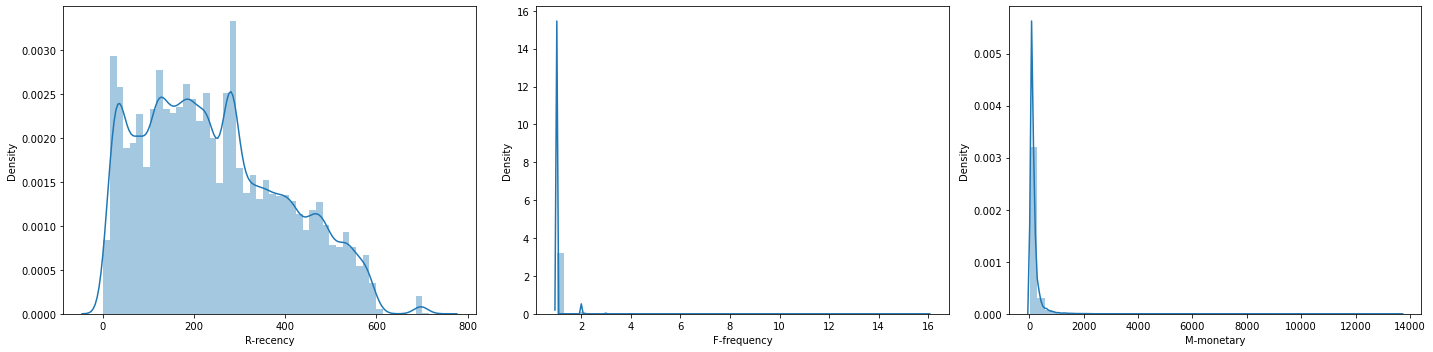

In [173]:
rfm_list=['R-recency','F-frequency','M-monetary']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(rfm_list)):
    sns.distplot(d3_final1_z1[y], ax=axes[i])
    plt.tight_layout()

In [174]:
stats=d3_final1_z1.describe()
stats=stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
R-recency,95419.0,244.496484,153.153950,1.00,120.0,225.00,354.00,730.00
F-frequency,95419.0,1.034018,0.211235,1.00,1.0,1.00,1.00,16.00
M-monetary,95419.0,166.070491,228.341907,9.59,63.1,107.95,183.27,13664.08
Nombre_de_commandes_respectant_delais_livraison,95419.0,0.942590,0.350909,0.00,1.0,1.00,1.00,15.00
Diff_dépenses_produits_frais,95419.0,0.031294,0.174111,0.00,0.0,0.00,0.00,1.00
review_score_moyen_moyenne_par_commande_par_client,95419.0,4.071685,1.367408,0.00,4.0,5.00,5.00,5.00
payment_sequential_moyenne_par_commande_par_client,95419.0,1.044845,0.374785,1.00,1.0,1.00,1.00,29.00
payment_installments_moyenne_par_commande_par_client,95419.0,2.918697,2.692747,0.00,1.0,2.00,4.00,24.00
Nombre_total_catégories_moyenne_par_commande_par_client,95419.0,0.993133,0.145255,0.00,1.0,1.00,1.00,3.00
Nombre_total_vendeurs_moyenne_par_commande_par_client,95419.0,1.013262,0.119103,1.00,1.0,1.00,1.00,5.00


In [175]:
a=d3_final1_z1.loc[d3_final1_z1['F-frequency']>1]
a

,customer_unique_id,R-recency,F-frequency,M-monetary,Nombre_de_commandes_respectant_delais_livraison,Diff_dépenses_produits_frais,review_score_moyen_moyenne_par_commande_par_client,payment_sequential_moyenne_par_commande_par_client,payment_installments_moyenne_par_commande_par_client,Nombre_total_catégories_moyenne_par_commande_par_client,Nombre_total_vendeurs_moyenne_par_commande_par_client,Nombre_total_items_moyenne_par_commande_par_client
0,f7b62c75467e8ce080b201667cbbc274,697,2,168.05,2,0,2.5,1.0,3.0,1.0,1.0,1.5
26,08a374bca4063116d5530a7b04ecaf3f,22,2,342.77,2,0,5.0,1.0,10.0,1.0,1.5,3.5
28,a5d3bfee5b23b430b95c4ae295e1028a,589,2,213.70,2,0,1.0,1.0,1.0,1.0,1.0,5.5
31,eae0a83d752b1dd32697e0e7b4221656,133,2,2783.01,2,0,3.0,1.0,8.0,1.0,1.0,7.5
33,70ad91901ad4330af432978ff134fc6f,169,2,660.44,2,0,5.0,1.0,1.0,1.0,1.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...
96786,1772c0fbee58b154da028487de51b74c,48,2,386.29,2,0,5.0,1.0,10.0,1.0,1.0,1.0
96993,6dcf48fcc0c4d96dd7af8a0897ae9de8,49,2,447.28,2,0,3.0,1.5,7.5,1.0,1.5,3.5
97197,22f6af8201369f9eb96592db3142b9c2,202,2,805.12,1,0,3.0,1.0,1.0,1.0,1.0,4.0
97366,17e873c00e3fef97c9f1347c6681bd1a,346,2,794.60,2,0,5.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#Notez que:
#- la plupart des clients on fait leur dernier achat dans les 350 jours avant le 3 septembre 2018 (dernière date d'achats 
#du dataset complet).
#- comme attendu la plupart des clients ont fait qu'une seule commande. Seul 2913 clients sur 95419 soit 3,05% des clients
#  comme attendu.

#- la plupart des client ont dépensé entre 0 et 180. C'est donc des petits montant qui sont les plus récurrents.

#Pour ce qui est des distributions des autres variables:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

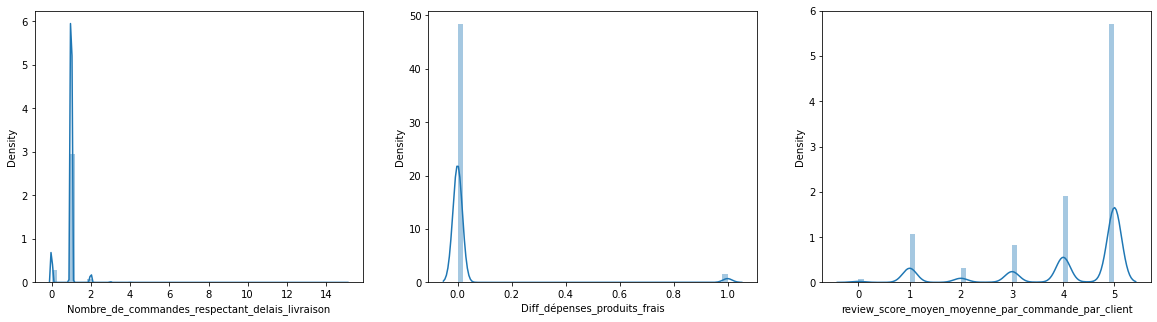

In [176]:
var1_list=['Nombre_de_commandes_respectant_delais_livraison','Diff_dépenses_produits_frais','review_score_moyen_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(var1_list)):
        sns.distplot(d3_final1_z1[y], ax=axes[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

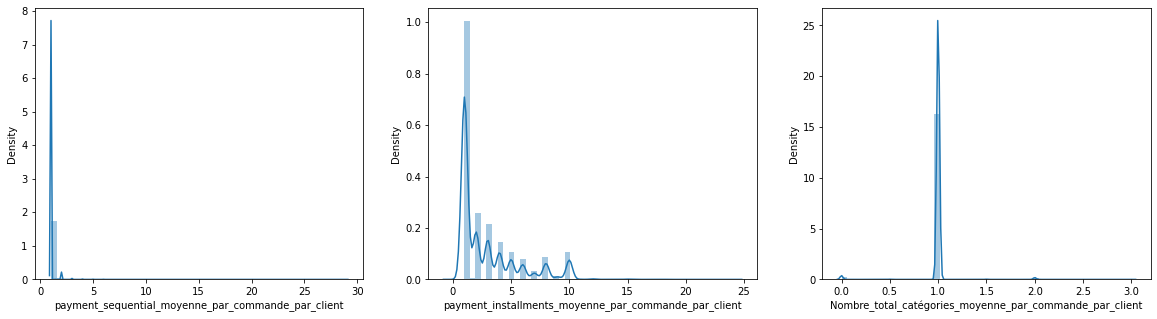

In [177]:
var2_list=['payment_sequential_moyenne_par_commande_par_client','payment_installments_moyenne_par_commande_par_client','Nombre_total_catégories_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(var2_list)):
        sns.distplot(d3_final1_z1[y], ax=axes[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


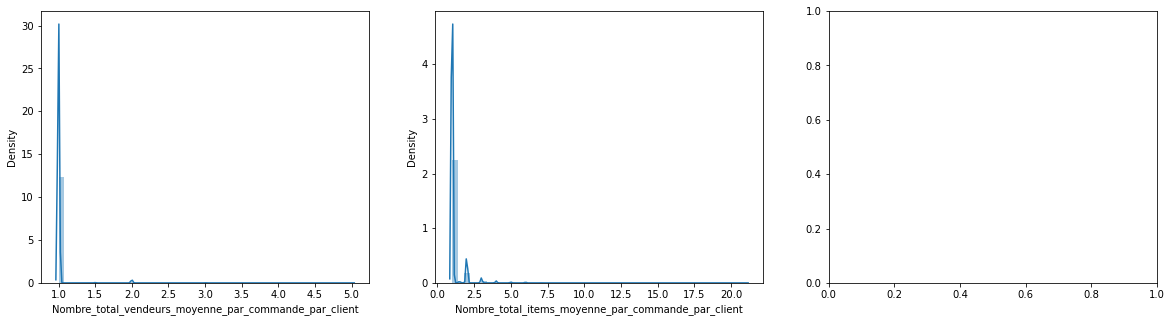

In [178]:
var3_list=['Nombre_total_vendeurs_moyenne_par_commande_par_client','Nombre_total_items_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))

for i, y in enumerate(list(var3_list)):
        sns.distplot(d3_final1_z1[y], ax=axes[i])

In [ ]:
#En regardant les distributions des autres variables dans tout le dataset on constate qu'elles sont assez biaisées par 
#l'influence des clients qui ont fait une seule commande pendant la période. Ainsi, par exemple oui, le plupart des
#'review_score_moyen_moyenne_par_commande_par_client' sont à 5 mais ça ne veut pas dire grand chose car la plupart des 
#clients on une 'F-frequency' de 1 (ie. ils ont fait une seule commande pendant la période).

#Ce sera peut être intéressant de voir leur comportement uniquement, sur les 3.05% des clients ayant effectué plus de au 
#moins 2 commande durant la période.

#C.1.2 Distributions sur les 3.05% des clients qui ont effectué au moins 2 commandes durant la période.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

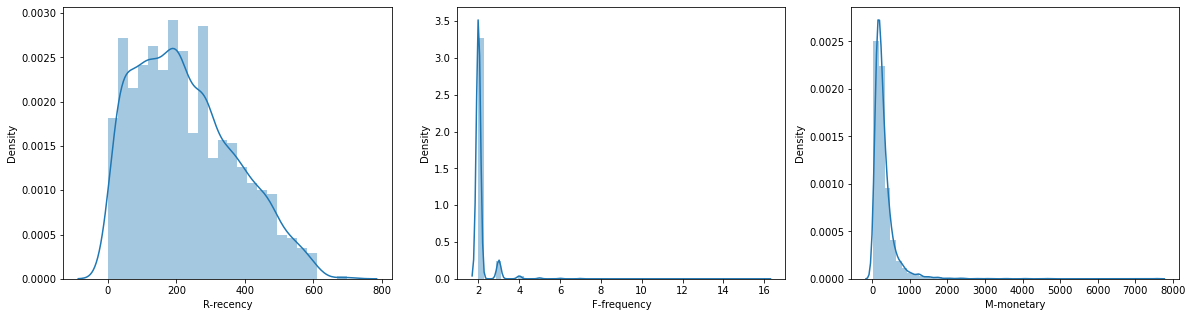

In [179]:
rfm_list=['R-recency','F-frequency','M-monetary']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(rfm_list)):
    sns.distplot(a[y], ax=axes[i])

In [180]:
a.describe()

,R-recency,F-frequency,M-monetary,Nombre_de_commandes_respectant_delais_livraison,Diff_dépenses_produits_frais,review_score_moyen_moyenne_par_commande_par_client,payment_sequential_moyenne_par_commande_par_client,payment_installments_moyenne_par_commande_par_client,Nombre_total_catégories_moyenne_par_commande_par_client,Nombre_total_vendeurs_moyenne_par_commande_par_client,Nombre_total_items_moyenne_par_commande_par_client
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,227.081703,2.114315,310.544456,1.948850,0.010985,4.115728,1.058723,3.315886,1.001962,1.023851,1.210422
std,144.404825,0.507814,326.594582,0.641775,0.104251,1.151375,0.448831,2.663404,0.121107,0.112243,0.546534
min,1.000000,2.000000,34.970000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,111.000000,2.000000,146.130000,2.000000,0.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,206.000000,2.000000,225.630000,2.000000,0.000000,4.500000,1.000000,2.500000,1.000000,1.000000,1.000000
75%,326.000000,2.000000,361.090000,2.000000,0.000000,5.000000,1.000000,5.000000,1.000000,1.000000,1.000000
max,697.000000,16.000000,7571.630000,15.000000,1.000000,5.000000,16.500000,17.000000,2.000000,2.000000,9.000000


In [ ]:
#C'est très intéressant. Parmi les clients qui ont effectué au moins 2 commandes:
#-Les conditions pour le R-recency restent presque les mêmes: La plupart des clients on effectué leur dernière commande
# dans les 330 jours (au lieu de 350, ce qui reste su même ordre) avant la dernière commande du dataset entier.

#- La plupart des clients font cette fois-ci 2 commandes. On passe de 1 a 2 franchement ce n'est pas une grosse amélioration
#et on a diminué la base de données de beaucoup.

#- Par contre pour le M-monetary il double à 360, mais ça reste quand même de petits montants.

#Dans les variables RFM considérer uniquement les 3.05% de clients qui ont fait au moins une commande ne change pas grand
#chose.

#Voyons pour les autres variables.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

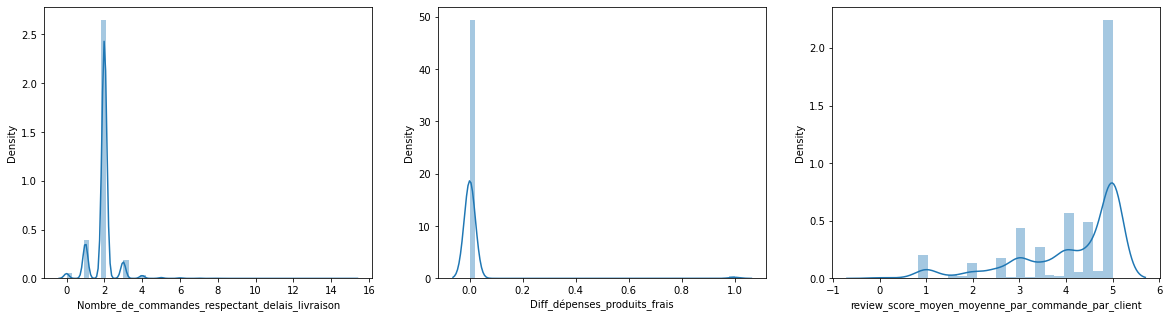

In [181]:
var1_list=['Nombre_de_commandes_respectant_delais_livraison','Diff_dépenses_produits_frais','review_score_moyen_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(var1_list)):
        sns.distplot(a[y], ax=axes[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

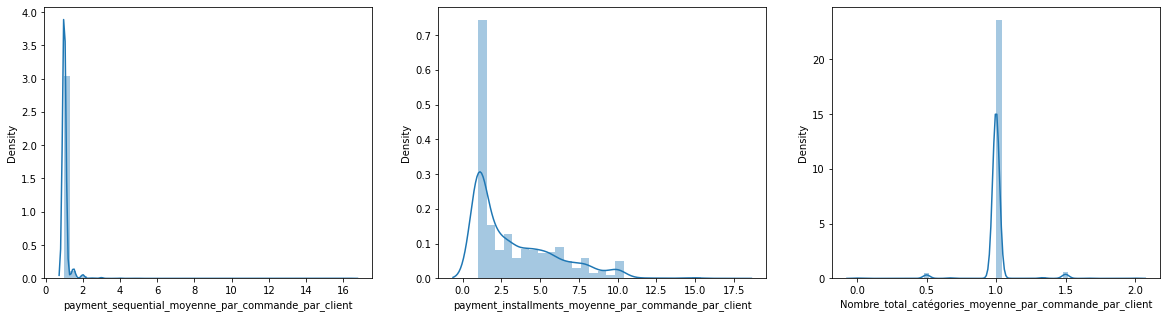

In [182]:
var2_list=['payment_sequential_moyenne_par_commande_par_client','payment_installments_moyenne_par_commande_par_client','Nombre_total_catégories_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(var2_list)):
        sns.distplot(a[y], ax=axes[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


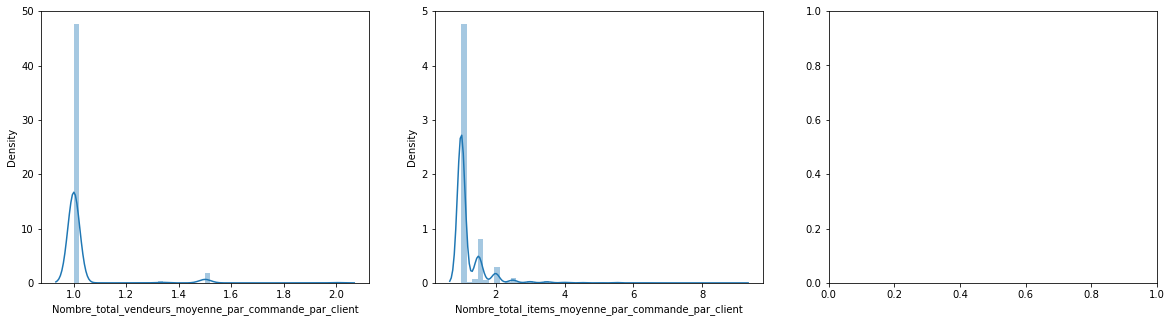

In [183]:
var3_list=['Nombre_total_vendeurs_moyenne_par_commande_par_client','Nombre_total_items_moyenne_par_commande_par_client']

fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, y in enumerate(list(var3_list)):
        sns.distplot(a[y], ax=axes[i])

In [ ]:
#Il en ressort juste qu'ils ont un peu plus de meilleurs 'review_score_moyen_moyenne_par_commande_par_client' et
#un peu plus de 'Nombre_total_items_moyenne_par_commande_par_client', mais c'est juste comme si on faisait un zoom.


#C.2 Heatmap des corrélations:
#C.2.1 En prenant en compte l'ensemble du dataset.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


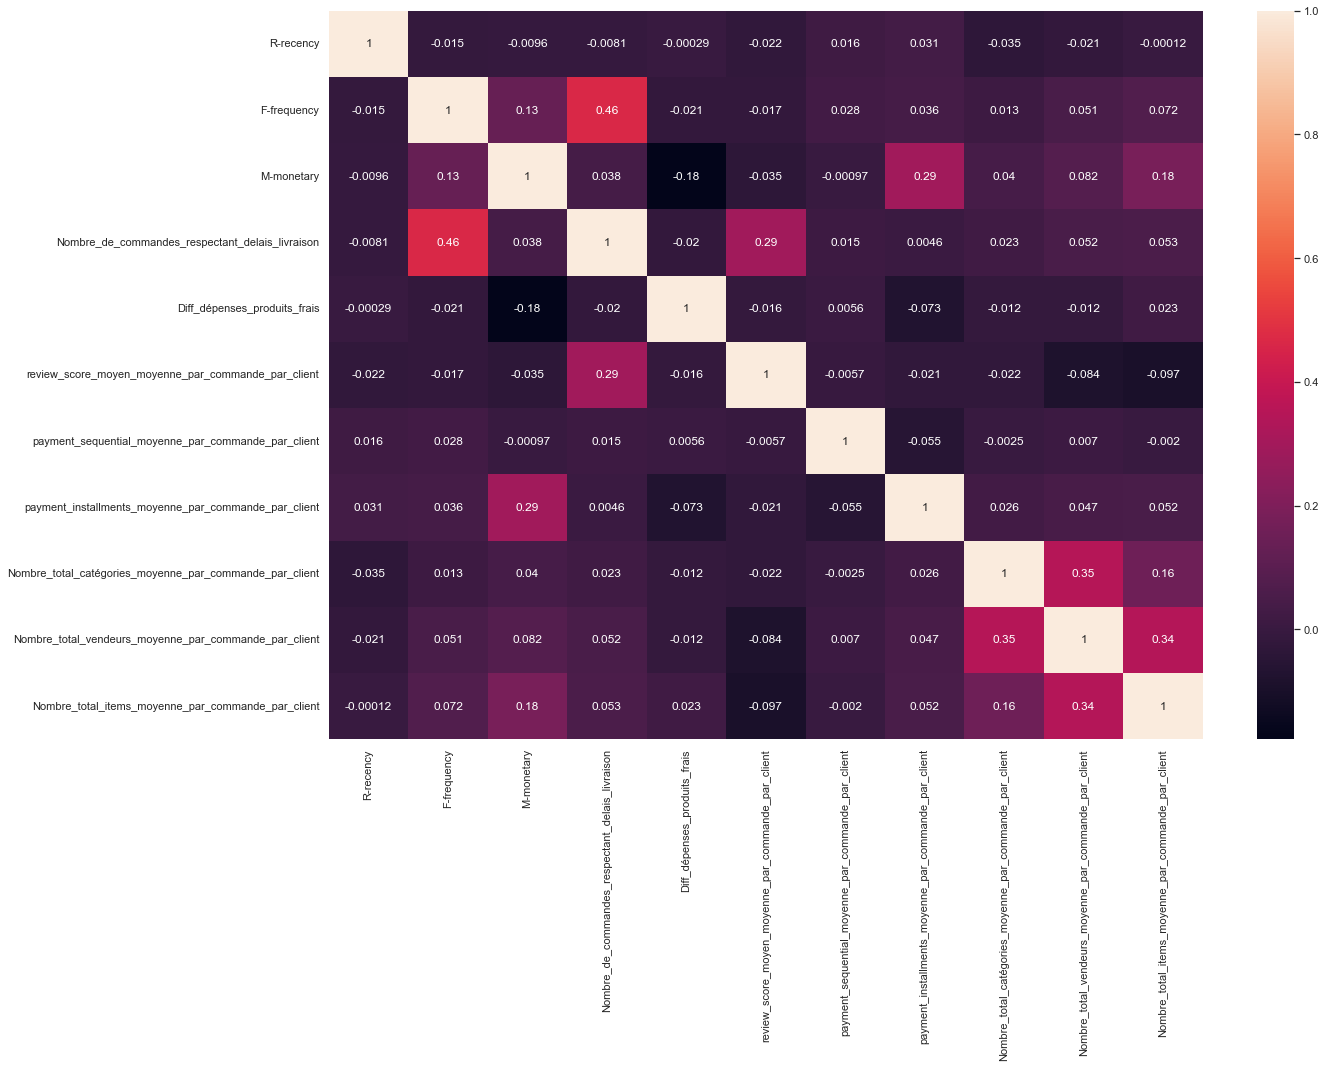

In [185]:
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
plt.rc('axes', labelsize=15)
sns.set(font_scale=1)
sns.heatmap(d3_final1_z1.corr(method='kendall'), annot=True)
plt.tight_layout()
plt.show()

In [ ]:
#Il est intéressant de voir que les variables sont très peu corrélées entre elles.
#Les plus corrélées étant:
#- 'F-frequency' avec le 'Nombre_de_commandes_respectant_delais_livraison' (O.46). Normal, le moins le délais de livraison
#   est respecté le moins le client est content du coup le moins il achète.

#- le 'Nombre_de_commandes_respectant_delais_livraison' avec le 'review_score_moyen_moyenne_par_commande_par_client'. 
#  Normal, le moins le délais de livraison est respecté le moins le client est content du coup ça influence la note.

#- le 'M-monetary' avec le 'payment_installments_moyenne_par_commande_par_client'. Intéressant le plus on a de 
#  moyens de faire des petit versements, le plus on dépense.

#- les 'Nombre_total_catégories_moyenne_par_commande_par_client' et 'Nombre_total_vendeurs_moyenne_par_commande_par_client'.
#  Normal plus on a de catégories, plus on a de vendeurs.

#- les 'Nombre_total_vendeurs_moyenne_par_commande_par_client' et 'Nombre_total_items_moyenne_par_commande_par_client'.
#  Intéressant plus on a de produits dans une commande plus on a des vendeurs différents, on a pas des vendeurs diversifiés.


#En faisant un zoom que sur les variables RFM il en ressort que les variables les plus corrélées entre elles, même si ce 
#n'est que de façon faible sont: 'F-frequency' et 'M-Monetary'. C'est à dire le plus souvent j’achète (ie. le plus content
#est le client), le plus il dépense, ce qui est complètement compréhensible.


#C.2.2 En prenant en compte uniquement les 3.05% de clients ayant effectué au moins 2 commandes dans la période.

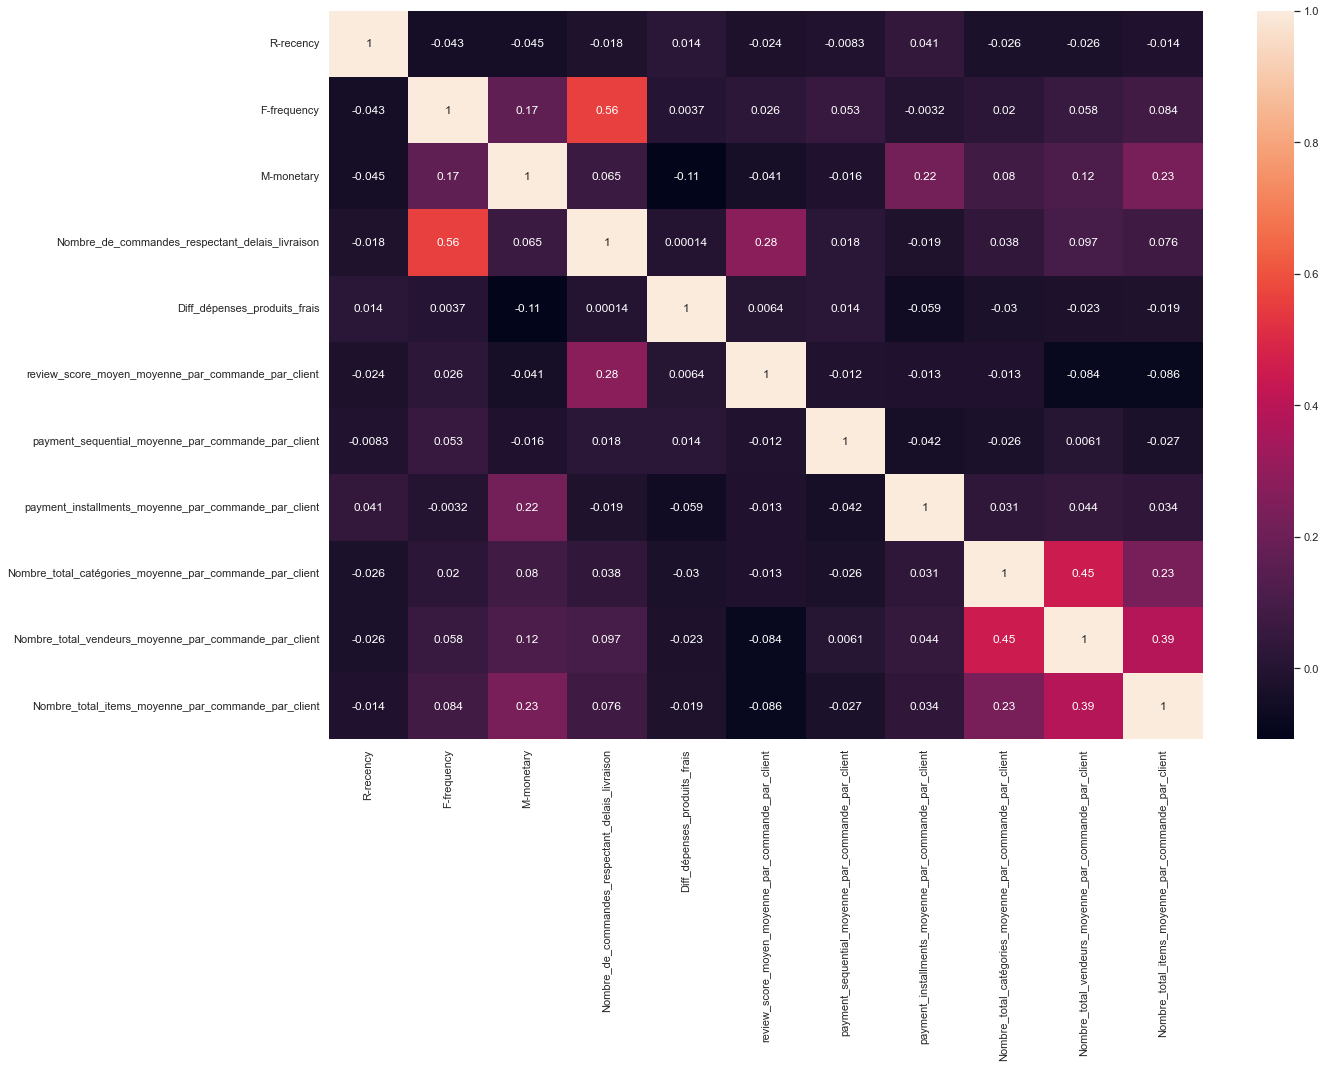

In [186]:
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
plt.rc('axes', labelsize=15)
sns.set(font_scale=1)
sns.heatmap(a.corr(method='kendall'), annot=True)
plt.tight_layout()
plt.show()

In [ ]:
#Notez que toutes les remarquent concernant les corrélations se confirment en prenant en compte uniquement les 3.05% des
#client ayant effectué au moins 2 commandes.



#En regardant les variables on perçoit de grandes variations. K-Means est basé sur la distance, il est donc nécessaire 
#d'ajuster, normaliser les données pour éviter de créer un modèle biaisé.

#Pour faire cette normalisation/ajustement de façons plus simple sur toutes les colonnes saut le 'customer_unique_id',
#On utilisera la méthode alternative: 'MinMaxScaler()', qui permet de normaliser les colonnes de sorte à qu'elle aient
#un range compris entre 0 à 1

#C.3 On garde le tableau avant normalization.

In [187]:
d3_final1_z1.to_csv(r'C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data\Data.csv', index = False)

In [ ]:
#C.4 Normalisations des variables.

In [188]:
A=d3_final1_z1
A.describe()

,R-recency,F-frequency,M-monetary,Nombre_de_commandes_respectant_delais_livraison,Diff_dépenses_produits_frais,review_score_moyen_moyenne_par_commande_par_client,payment_sequential_moyenne_par_commande_par_client,payment_installments_moyenne_par_commande_par_client,Nombre_total_catégories_moyenne_par_commande_par_client,Nombre_total_vendeurs_moyenne_par_commande_par_client,Nombre_total_items_moyenne_par_commande_par_client
count,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000
mean,244.496484,1.034018,166.070491,0.942590,0.031294,4.071685,1.044845,2.918697,0.993133,1.013262,1.139081
std,153.153950,0.211235,228.341907,0.350909,0.174111,1.367408,0.374785,2.692747,0.145255,0.119103,0.526848
min,1.000000,1.000000,9.590000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,120.000000,1.000000,63.100000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,225.000000,1.000000,107.950000,1.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,354.000000,1.000000,183.270000,1.000000,0.000000,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000
max,730.000000,16.000000,13664.080000,15.000000,1.000000,5.000000,29.000000,24.000000,3.000000,5.000000,21.000000


In [189]:
scaler=MinMaxScaler()
A[['R-recency','F-frequency','M-monetary',
                  'Nombre_de_commandes_respectant_delais_livraison',
                  'Diff_dépenses_produits_frais',
                  'review_score_moyen_moyenne_par_commande_par_client',
                  'payment_sequential_moyenne_par_commande_par_client',
                  'payment_installments_moyenne_par_commande_par_client',
                  'Nombre_total_catégories_moyenne_par_commande_par_client',
                  'Nombre_total_vendeurs_moyenne_par_commande_par_client',
                  'Nombre_total_items_moyenne_par_commande_par_client']]=scaler.fit_transform(A[['R-recency',
                                                                                                           'F-frequency',
                                                                                                           'M-monetary',
                                                                                                           'Nombre_de_commandes_respectant_delais_livraison',
                                                                                                           'Diff_dépenses_produits_frais',
                                                                                                           'review_score_moyen_moyenne_par_commande_par_client',
                                                                                                           'payment_sequential_moyenne_par_commande_par_client',
                                                                                                           'payment_installments_moyenne_par_commande_par_client',
                                                                                                           'Nombre_total_catégories_moyenne_par_commande_par_client',
                                                                                                           'Nombre_total_vendeurs_moyenne_par_commande_par_client',
                                                                                                           'Nombre_total_items_moyenne_par_commande_par_client']])


In [190]:
stats_norm=A.describe()
stats_norm=stats_norm.transpose()
stats_norm

,count,mean,std,min,25%,50%,75%,max
R-recency,95419.0,0.334014,0.210088,0.0,0.163237,0.307270,0.484225,1.0
F-frequency,95419.0,0.002268,0.014082,0.0,0.000000,0.000000,0.000000,1.0
M-monetary,95419.0,0.011460,0.016723,0.0,0.003919,0.007203,0.012720,1.0
Nombre_de_commandes_respectant_delais_livraison,95419.0,0.062839,0.023394,0.0,0.066667,0.066667,0.066667,1.0
Diff_dépenses_produits_frais,95419.0,0.031294,0.174111,0.0,0.000000,0.000000,0.000000,1.0
review_score_moyen_moyenne_par_commande_par_client,95419.0,0.814337,0.273482,0.0,0.800000,1.000000,1.000000,1.0
payment_sequential_moyenne_par_commande_par_client,95419.0,0.001602,0.013385,0.0,0.000000,0.000000,0.000000,1.0
payment_installments_moyenne_par_commande_par_client,95419.0,0.121612,0.112198,0.0,0.041667,0.083333,0.166667,1.0
Nombre_total_catégories_moyenne_par_commande_par_client,95419.0,0.331044,0.048418,0.0,0.333333,0.333333,0.333333,1.0
Nombre_total_vendeurs_moyenne_par_commande_par_client,95419.0,0.003316,0.029776,0.0,0.000000,0.000000,0.000000,1.0


In [191]:
A.count()

customer_unique_id                                         95419
R-recency                                                  95419
F-frequency                                                95419
M-monetary                                                 95419
Nombre_de_commandes_respectant_delais_livraison            95419
Diff_dépenses_produits_frais                               95419
review_score_moyen_moyenne_par_commande_par_client         95419
payment_sequential_moyenne_par_commande_par_client         95419
payment_installments_moyenne_par_commande_par_client       95419
Nombre_total_catégories_moyenne_par_commande_par_client    95419
Nombre_total_vendeurs_moyenne_par_commande_par_client      95419
Nombre_total_items_moyenne_par_commande_par_client         95419
dtype: int64

In [ ]:
#C.5 On garde le dernier tableau cette fois-ci normalisé en format CSV.

In [192]:
A.to_csv(r'C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data\Data_norm.csv', index = False)

In [ ]:
#C.6 On gardera aussi le tableau aves la variable 'Date_du_dernier_achat_par_client' pour la simulation.

In [193]:
df_simulation.to_csv(r'C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data\Data_sim.csv', index = False)

In [194]:
d3_final1_y.to_csv(r'C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 5\Data\Data_sim2.csv', index = False)